In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("customer_data.csv")

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    04/09/12       58       635  ...                  7             0   
1    08/03/14       38        11  ...                  5             0   
2    21/08/13       26       426  ...                  4             0   
3    10/02/14       26        11  ...                  6             0   
4    19/01/14       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# EDA

In [5]:
#Seperating Out Date,Month & Year of Customer Enrollment
df["Date_enroll"]=df["Dt_Customer"].str.split("/").str[0]
df["Month_enroll"]=df["Dt_Customer"].str.split("/").str[1]
df["Year_enroll"]=df["Dt_Customer"].str.split("/").str[2]

In [6]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0    04/09/12       58       635  ...             0             0   
1    08/03/14       38        11  ...             0             0   
2    21/08/13       26       426  ...             0             0   
3    10/02/14       26        11  ...             0             0   
4    19/01/14       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Date_enroll  \
0             0         0              3         11         1           04   
1             0         0              3         11         0           08   
2             0         0              3         11         0           21   
3             0         0              3         11         0           10   
4             0         0              3         11         0           19   

   Month_enroll  Year_enroll  
0            09           12  
1            03           14  
2            08           13  
3            02           14  
4            01           14  

[5 rows x 32 columns]

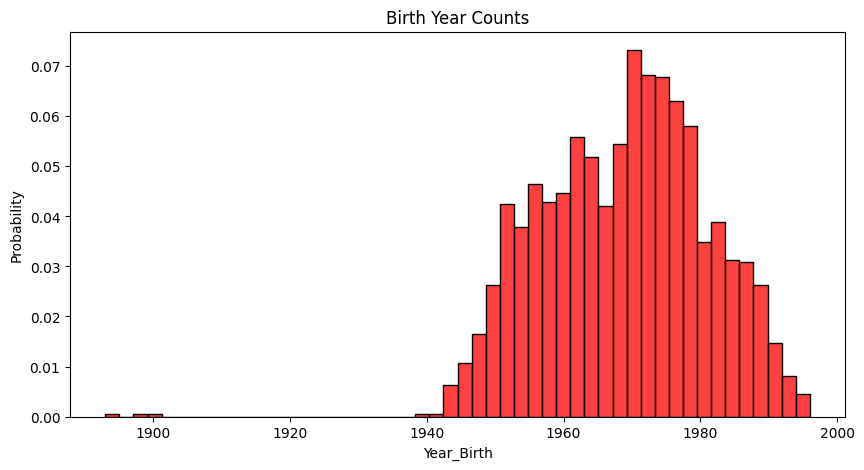

In [7]:
#Birth Year Values
plt.figure(figsize=(10,5))
sns.histplot(df["Year_Birth"],bins=50,color="red",stat="probability")
plt.title("Birth Year Counts")
plt.show()

1.Dataset is of people born between 1940-2000.

*2 or 3 variables of data are from year 1900 or earlier it can be result of wrong entry or an outlier.*

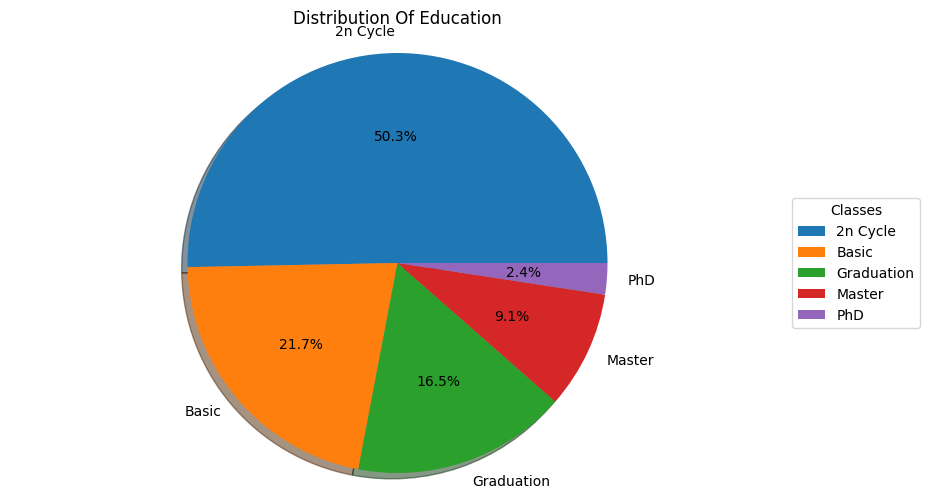

In [8]:
#Types Of Education
plt.figure(figsize=(10,6))
plt.pie(df["Education"].value_counts(),autopct="%1.1f%%",labels=np.unique(df["Education"]),shadow=True)
plt.title("Distribution Of Education")
plt.legend(title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.show()

1.Education is divided into 5 types:

    i.Graduation   ---16.5%
    ii.Basic       ---21.7%         
    iii.Master     ---9.1%
    iv.PhD         ---2.4%
    v.2n Cycle     ---50.3%

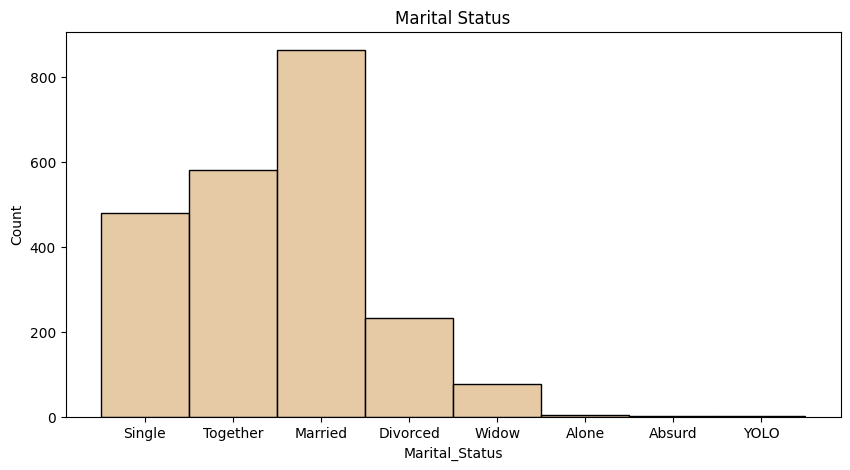

In [9]:
#Marital Status Values
plt.figure(figsize=(10,5))
sns.histplot(df["Marital_Status"],bins=8,color="burlywood",element="bars")
plt.title("Marital Status")
plt.show()

1.Marital Status is divided into 8 types:

    'Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO'

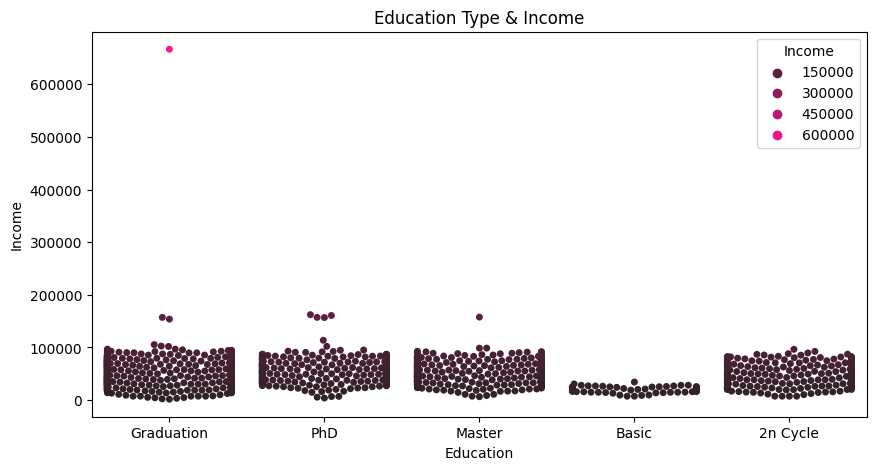

In [10]:
#Education Type & Income 
plt.figure(figsize=(10,5))
sns.swarmplot(x=df["Education"],y=df["Income"],hue=df["Income"],color="deeppink")
plt.title("Education Type & Income")
plt.show()

1.Income of Basic education is less comapred to others.

2.Highest Income generated is from Graduation but it can be wrong entry or outlier as well.

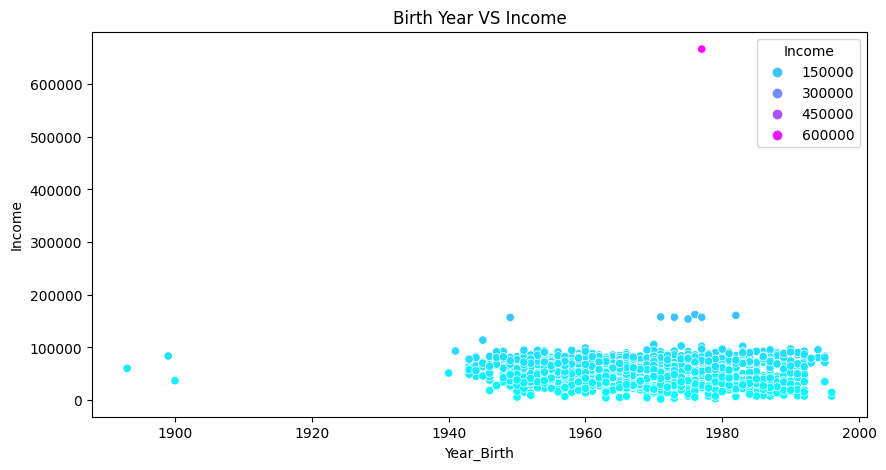

In [11]:
#Birth Year VS Income
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Year_Birth", y="Income",hue="Income",palette="cool")
plt.title("Birth Year VS Income")
plt.show()

1..Birth year wise income is distributed equally but some group of people from birth year 1970-1980 are earning more compared to others.


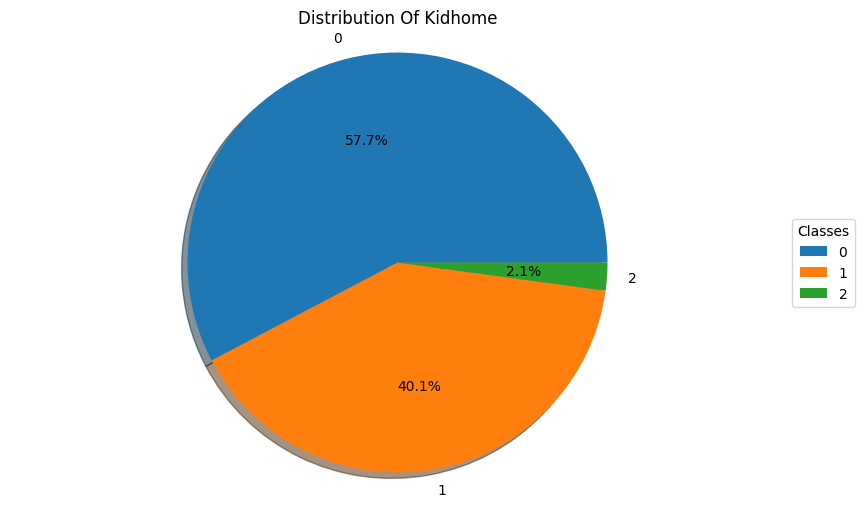

In [12]:
#Distribution Of Kidhome
plt.figure(figsize=(10,6))
plt.pie(df["Kidhome"].value_counts(),autopct="%1.1f%%",labels=np.unique(df["Kidhome"]),shadow=True)
plt.title("Distribution Of Kidhome")
plt.legend(title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.show()

1.50.7% of people do not have kids,40.1% people have 1 child whereas 2.1% people have 2childs.

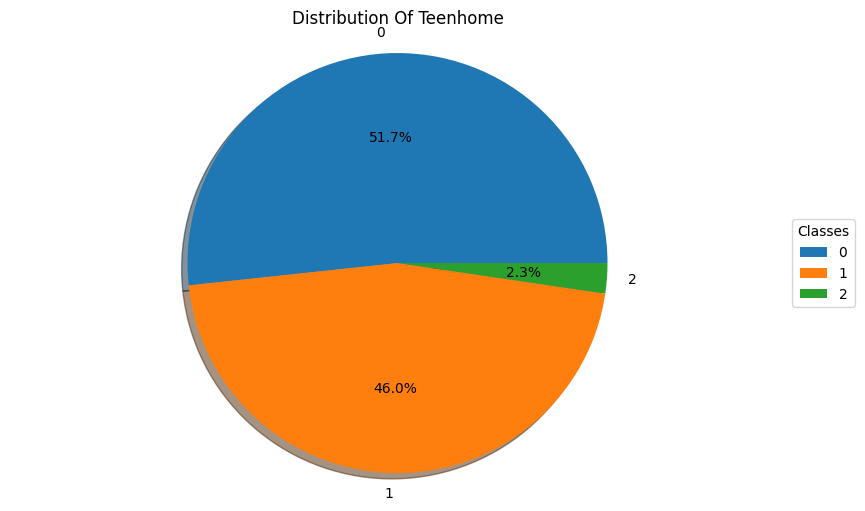

In [13]:
#Distribution Of Teenhome
plt.figure(figsize=(10,6))
plt.pie(df["Teenhome"].value_counts(),autopct="%1.1f%%",labels=np.unique(df["Teenhome"]),shadow=True)
plt.title("Distribution Of Teenhome")
plt.legend(title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.show()

1.51.7% of people do not have teens at their home,46.0% of people have 1 teen wheras 2.3% of people have 2 teens at home.

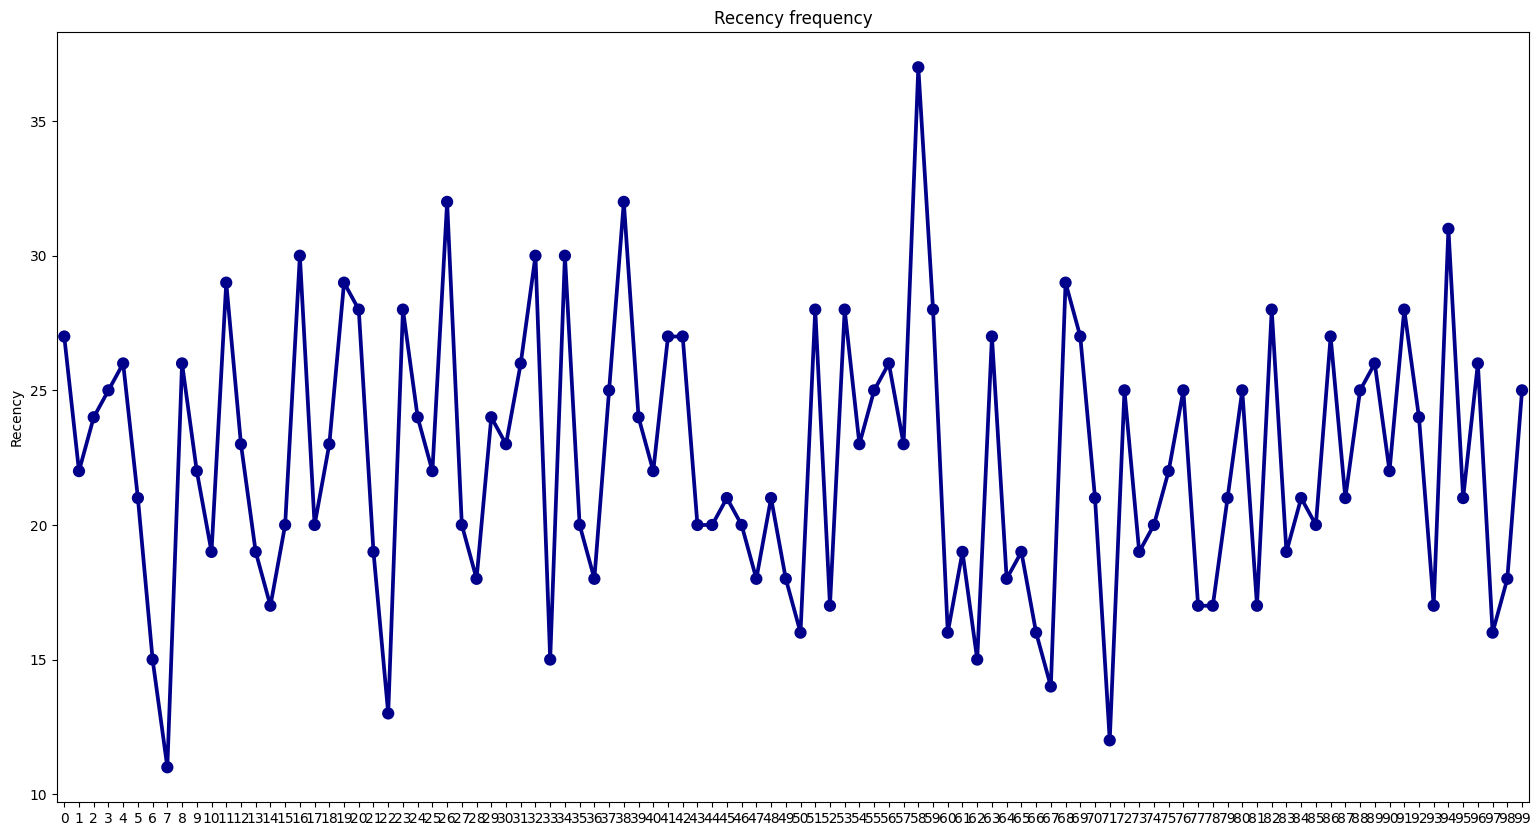

In [14]:
#Recency
plt.figure(figsize=(19,10))
sns.pointplot(x=df["Recency"].unique(),y=df["Recency"].value_counts(),color="darkblue")
plt.title("Recency frequency")
plt.show()

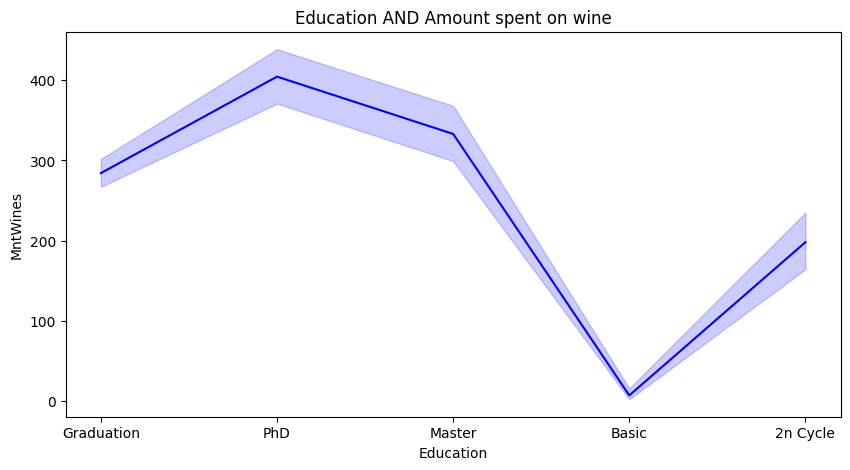

In [15]:
#MntWines:Amount Spent On wines
#Education & Wines
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Education",y="MntWines",color="blue")
plt.title("Education AND Amount spent on wine")
plt.show()

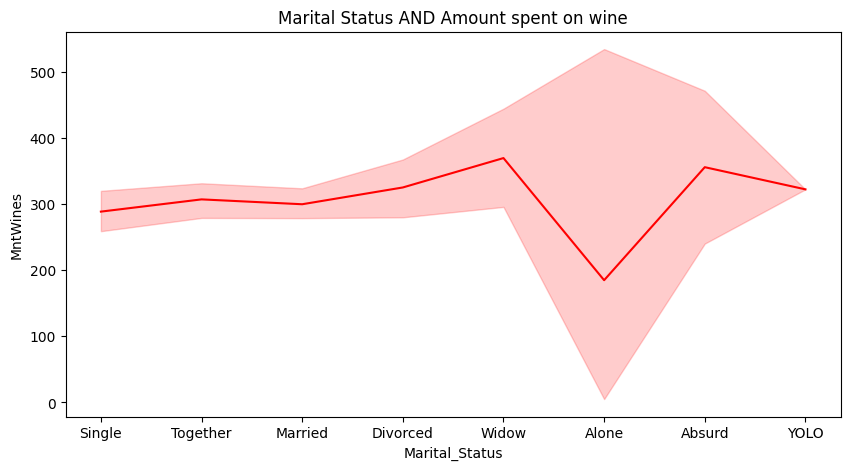

In [16]:
#Marital Status & Wines
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Marital_Status",y="MntWines",color="red")
plt.title("Marital Status AND Amount spent on wine")
plt.show()

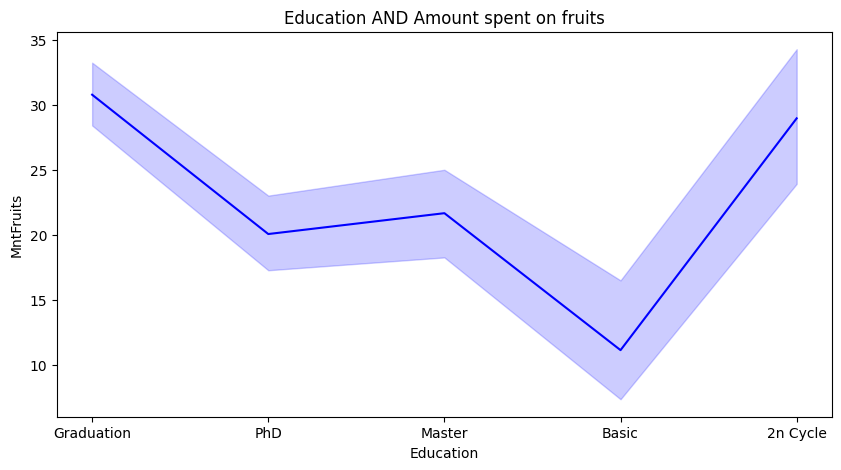

In [17]:
#MntFruits:Amount Spent On Fruits
#Education & Fruits
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Education",y="MntFruits",color="blue")
plt.title("Education AND Amount spent on fruits")
plt.show()

1.Maximum/Highest amount is spend on wine.

2.People with basic education are not spending any amount on wines.

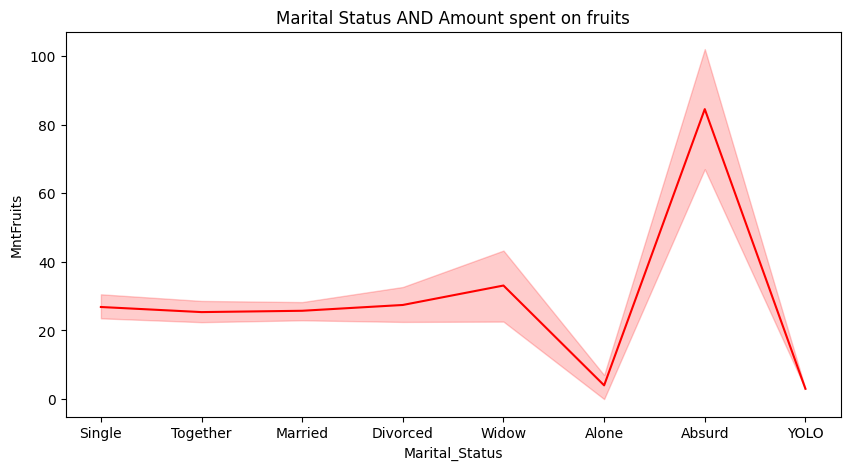

In [18]:
#Marital Status & fruits
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Marital_Status",y="MntFruits",color="red")
plt.title("Marital Status AND Amount spent on fruits")
plt.show()

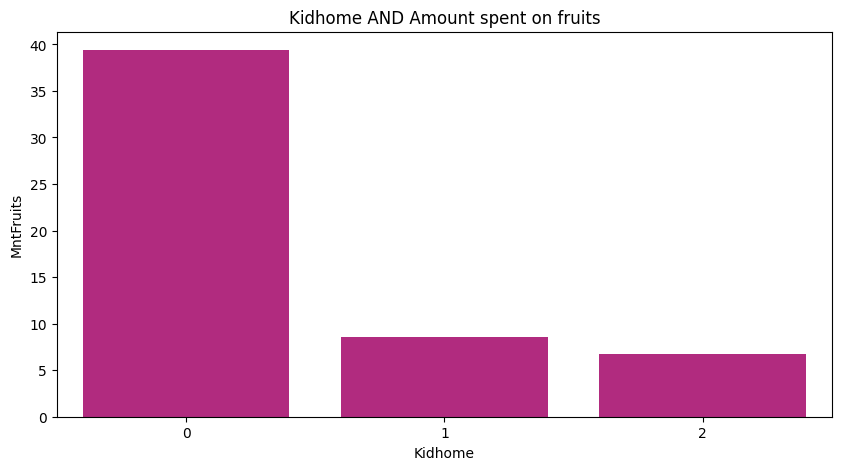

In [19]:
#Kidhome & fruits
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Kidhome",y="MntFruits",color="mediumvioletred",ci=None)
plt.title("Kidhome AND Amount spent on fruits")
plt.show()

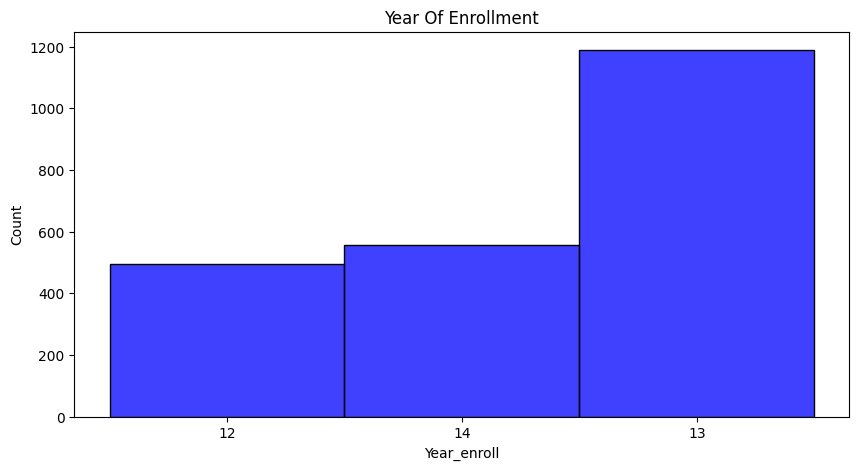

In [20]:
#Enrollment year wise
plt.figure(figsize=(10,5))
sns.histplot(df["Year_enroll"],color="blue")
plt.title("Year Of Enrollment")
plt.show()

1.Most of the registrations are from year 2013 in dataset provided of 2 years.

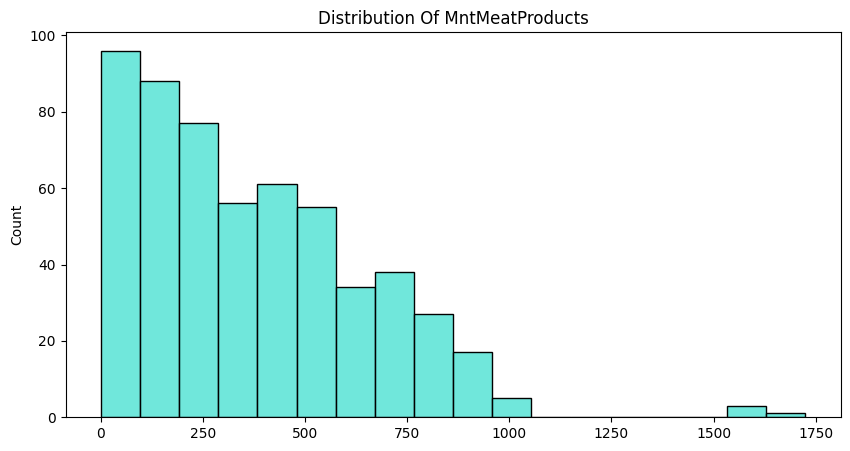

In [21]:
#Distribution Of MntMeatProducts
plt.figure(figsize=(10,5))
sns.histplot(df["MntMeatProducts"].unique(),color="turquoise")
plt.title("Distribution Of MntMeatProducts")
plt.show()

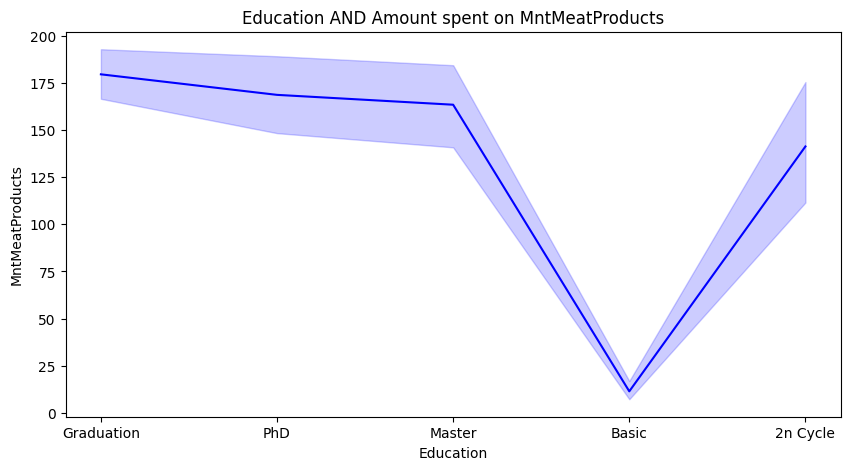

In [22]:
#MntFruits:Amount Spent On MntMeatProducts
#Education & MntMeatProducts
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Education",y="MntMeatProducts",color="blue")
plt.title("Education AND Amount spent on MntMeatProducts")
plt.show()

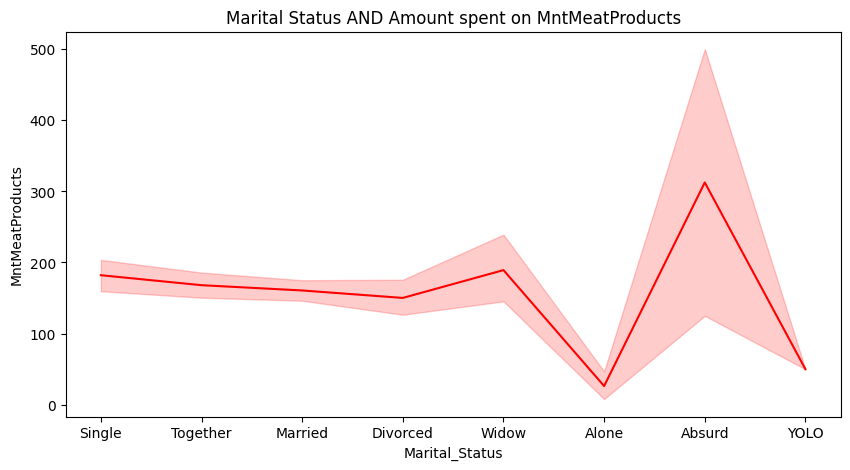

In [23]:
#Marital Status & MntMeatProducts
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Marital_Status",y="MntMeatProducts",color="red")
plt.title("Marital Status AND Amount spent on MntMeatProducts")
plt.show()

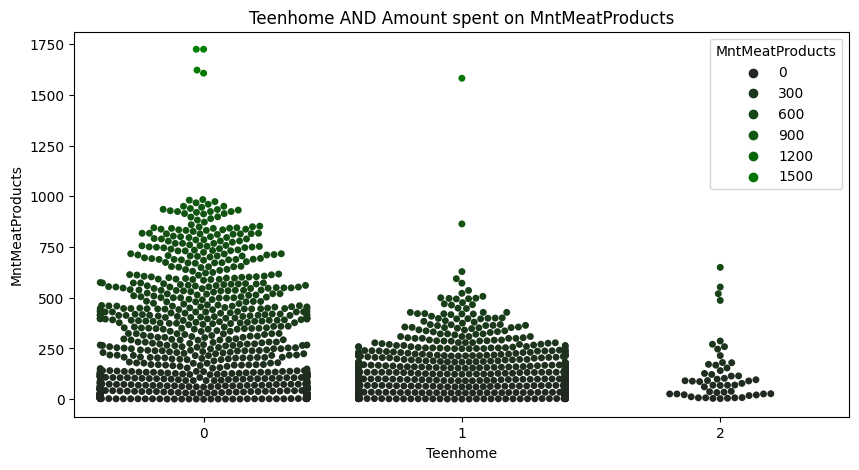

In [24]:
# Teenhome & MntMeatProducts
plt.figure(figsize=(10,5))
sns.swarmplot(data=df,x="Teenhome",y="MntMeatProducts",color="green",hue="MntMeatProducts")
plt.title("Teenhome AND Amount spent on MntMeatProducts")
plt.show()

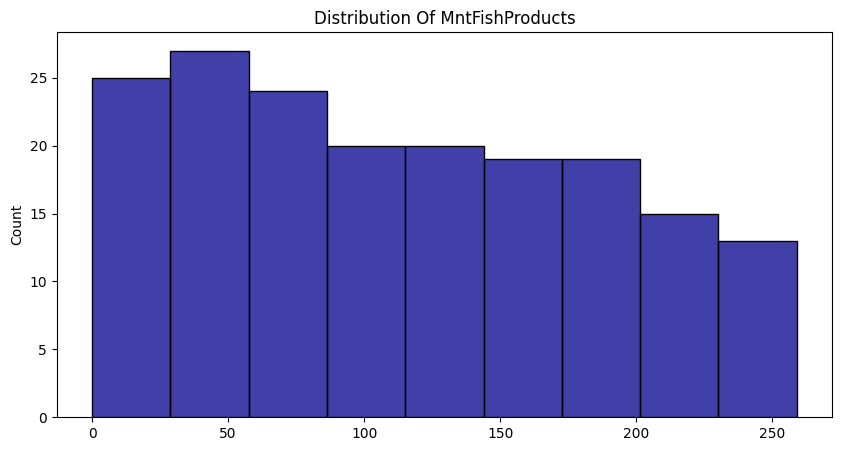

In [25]:
#Distribution Of MntMeatProducts
plt.figure(figsize=(10,5))
sns.histplot(df["MntFishProducts"].unique(),color="darkblue")
plt.title("Distribution Of MntFishProducts")
plt.show()

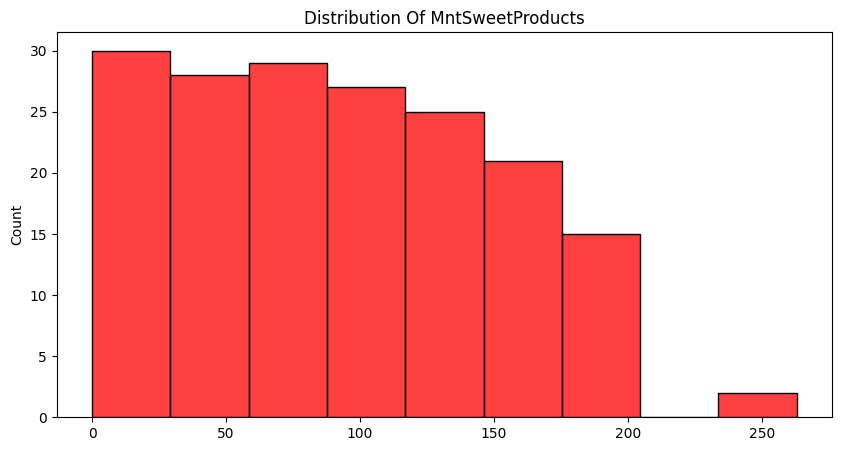

In [26]:
#Distribution Of MntSweetProducts
plt.figure(figsize=(10,5))
sns.histplot(df["MntSweetProducts"].unique(),color="red")
plt.title("Distribution Of MntSweetProducts")
plt.show()

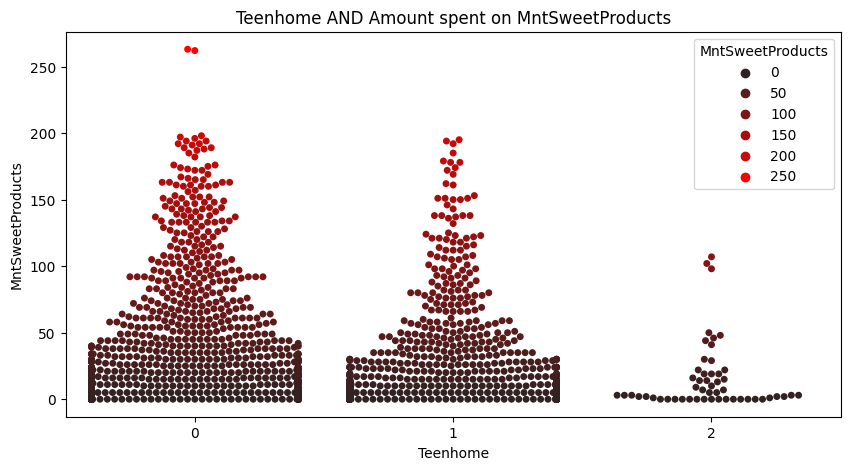

In [27]:
# Teenhome & MntSweetProducts
plt.figure(figsize=(10,5))
sns.swarmplot(data=df,x="Teenhome",y="MntSweetProducts",color="red",hue="MntSweetProducts",)
plt.title("Teenhome AND Amount spent on MntSweetProducts")
plt.show()

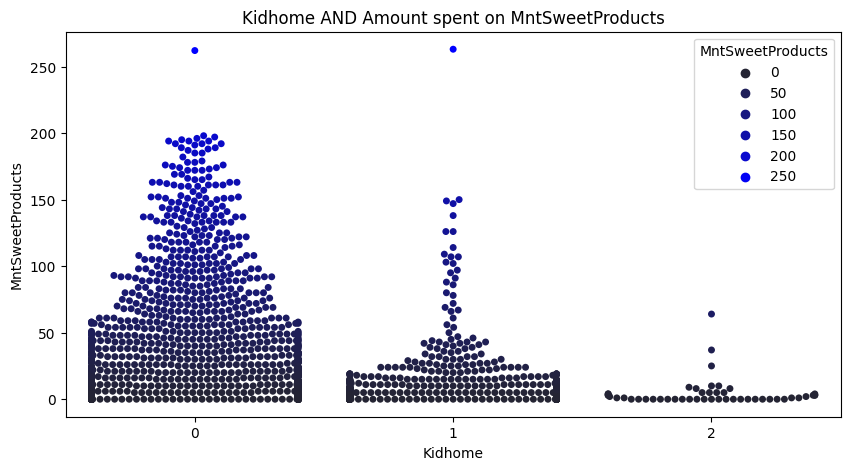

In [28]:
# Kidhome & MntSweetProducts
plt.figure(figsize=(10,5))
sns.swarmplot(data=df,x="Kidhome",y="MntSweetProducts",color="blue",hue="MntSweetProducts")
plt.title("Kidhome AND Amount spent on MntSweetProducts")
plt.show()

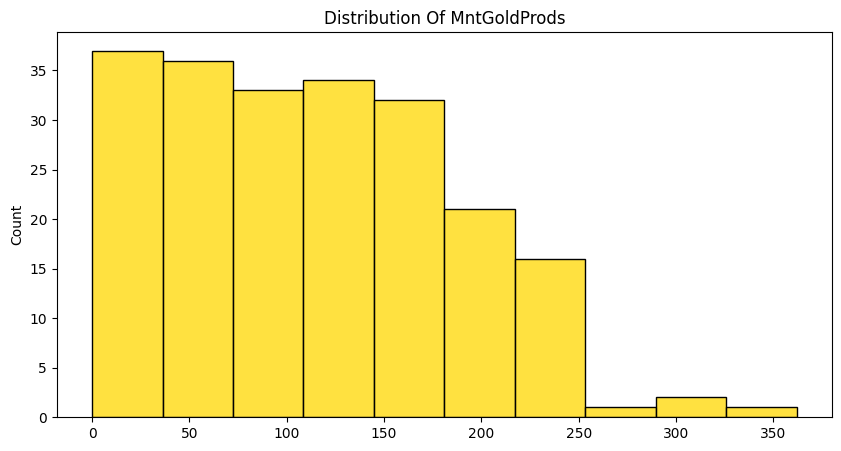

In [29]:
#Distribution Of MntGoldProds
plt.figure(figsize=(10,5))
sns.histplot(df["MntGoldProds"].unique(),color="gold")
plt.title("Distribution Of MntGoldProds")
plt.show()

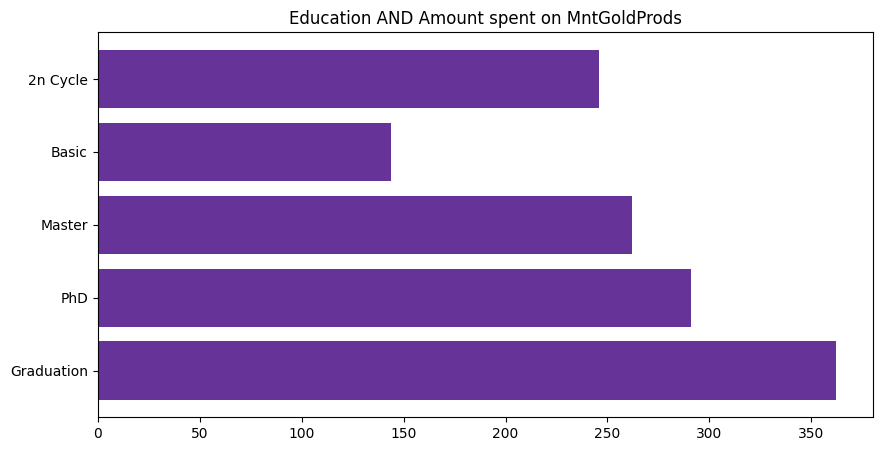

In [30]:
# MntGoldProds & Education
plt.figure(figsize=(10,5))
plt.barh(df["Education"],df["MntGoldProds"],color="rebeccapurple")
plt.title("Education AND Amount spent on MntGoldProds")
plt.show()

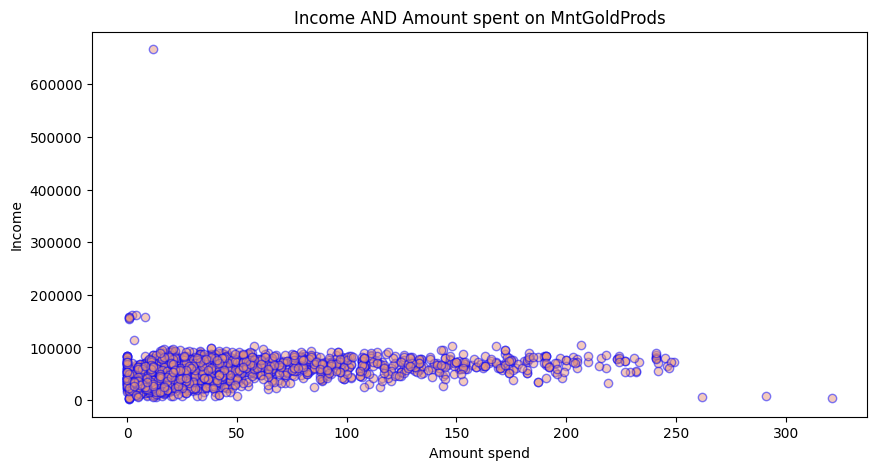

In [31]:
# Income & MntGoldProds
plt.figure(figsize=(10,5))
plt.scatter(df["MntGoldProds"],df["Income"],color="darksalmon",alpha=0.5,edgecolors="blue")
plt.xlabel("Amount spend")
plt.ylabel("Income")
plt.title("Income AND Amount spent on MntGoldProds")
plt.show()

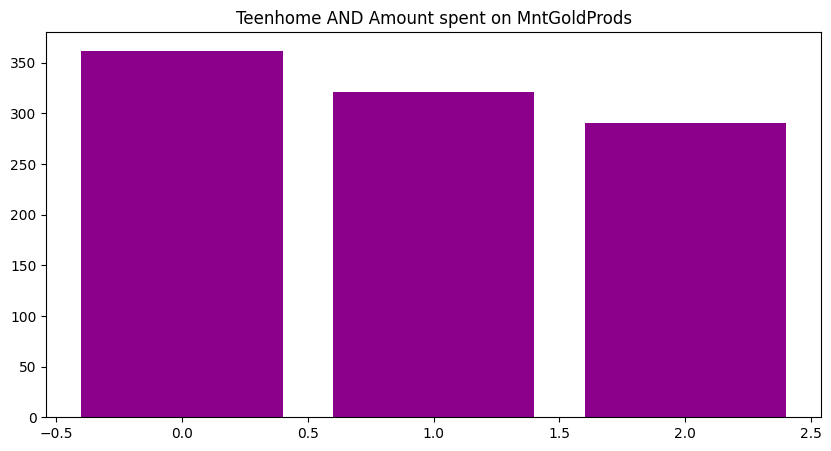

In [32]:
# Teenhome & MntGoldProds
plt.figure(figsize=(10,5))
plt.bar(df["Teenhome"],df["MntGoldProds"],color="darkmagenta")
plt.title( "Teenhome AND Amount spent on MntGoldProds")
plt.show()

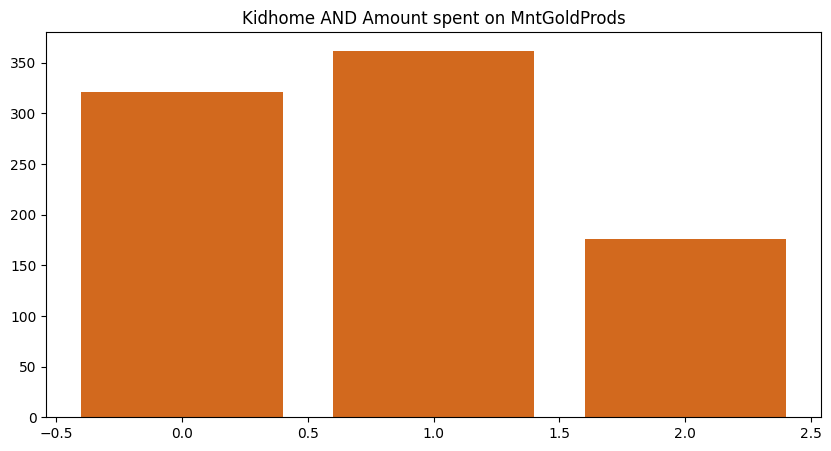

In [33]:
# Kidhome & MntGoldProds
plt.figure(figsize=(10,5))
plt.bar(df["Kidhome"],df["MntGoldProds"],color="chocolate")
plt.title( "Kidhome AND Amount spent on MntGoldProds")
plt.show()

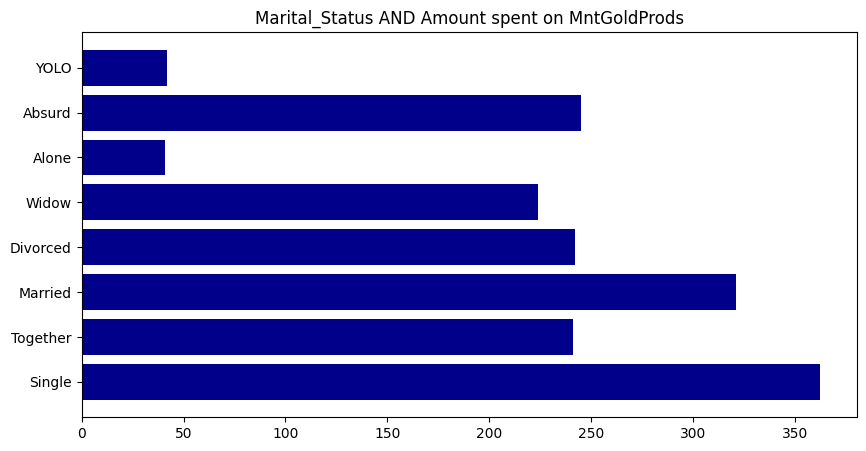

In [34]:
# MntGoldProds & Marital_Status
plt.figure(figsize=(10,5))
plt.barh(df["Marital_Status"],df["MntGoldProds"],color="darkblue")
plt.title("Marital_Status AND Amount spent on MntGoldProds")
plt.show()

1.People having 0 teens are spending more on gold followed by 1 and 2.

2.People having 2 kids are spending less on gold comapred with having 1 kid or none.

3..Single & married are spending more on gold than comapred to others.

In [35]:
df["NumDealsPurchases"].values

array([3, 2, 1, ..., 1, 2, 3], dtype=int64)

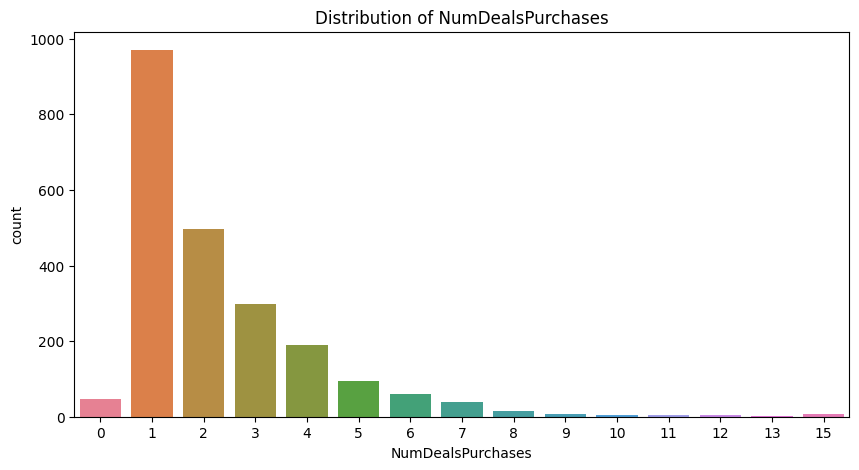

In [36]:
#NumDealsPurchases
plt.figure(figsize=(10,5))
sns.countplot(x=df["NumDealsPurchases"],palette="husl")
plt.ylabel("count")
plt.title("Distribution of NumDealsPurchases")
plt.show()

1.People Like to purchase when discount is there can be clearly seen that when discount was there many people have brought the items.

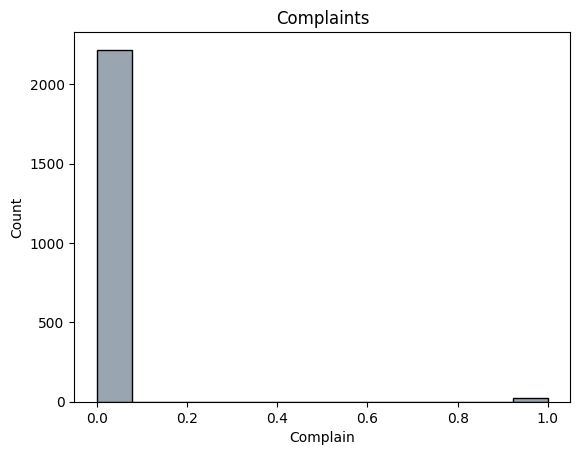

In [37]:
sns.histplot(df["Complain"],color="lightslategrey")
plt.title("Complaints")
plt.show()

1.There are not much complaints of customer only 21 complaints are there

In [38]:
#plotting respones of campaigns

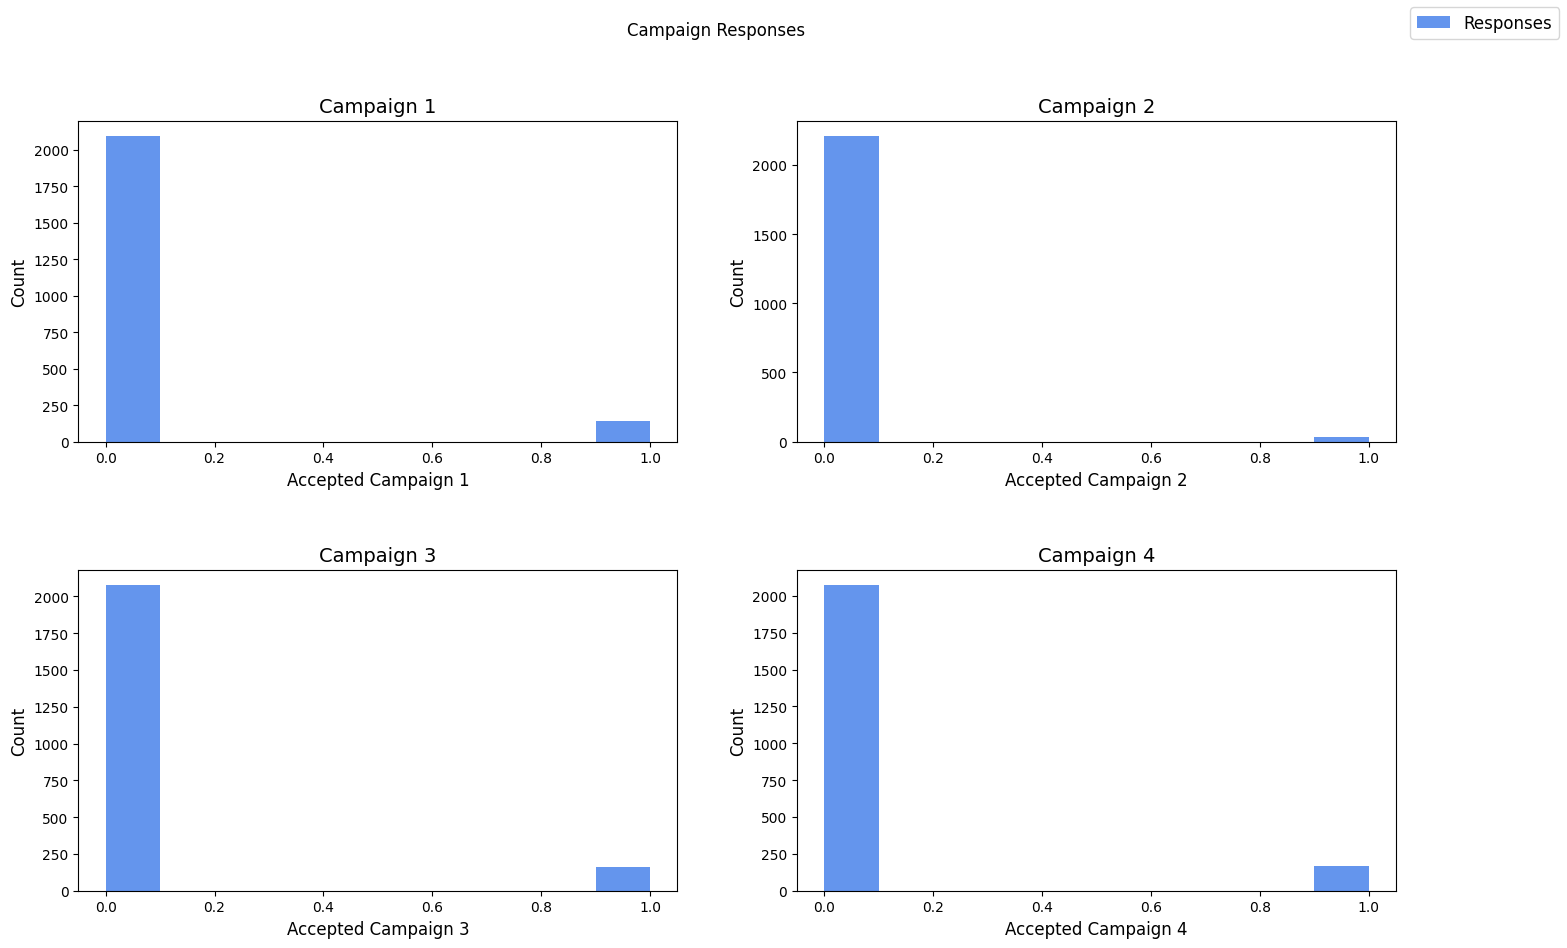

In [39]:
color = "cornflowerblue"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17,10))

axs[0, 0].hist(df["AcceptedCmp1"], color=color)
axs[0, 0].set_title("Campaign 1", fontsize=14)
axs[0, 0].set_xlabel("Accepted Campaign 1", fontsize=12)
axs[0, 0].set_ylabel("Count", fontsize=12)

axs[0, 1].hist(df["AcceptedCmp2"], color=color)
axs[0, 1].set_title("Campaign 2", fontsize=14)
axs[0, 1].set_xlabel("Accepted Campaign 2", fontsize=12)
axs[0, 1].set_ylabel("Count", fontsize=12)

axs[1, 0].hist(df["AcceptedCmp3"], color=color)
axs[1, 0].set_title("Campaign 3", fontsize=14)
axs[1, 0].set_xlabel("Accepted Campaign 3", fontsize=12)
axs[1, 0].set_ylabel("Count", fontsize=12)

axs[1, 1].hist(df["AcceptedCmp4"], color=color)
axs[1, 1].set_title("Campaign 4", fontsize=14)
axs[1, 1].set_xlabel("Accepted Campaign 4", fontsize=12)
axs[1, 1].set_ylabel("Count", fontsize=12)

fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.legend(labels=['Responses'], loc='upper right', fontsize=12)
fig.suptitle("Campaign Responses")
plt.show()

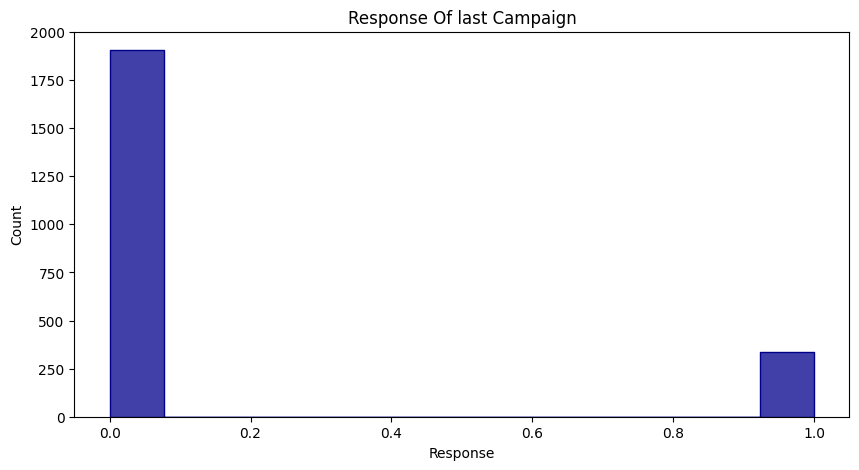

In [40]:
#Plotting response i.e of last campaign
plt.figure(figsize=(10,5))
sns.histplot(df["Response"],color="darkblue",element="step")
plt.title("Response Of last Campaign")
plt.show()

1.It can be clearly seen people doesnt accept the offer in 2nd campaign ,the ratio is almost same in other 3 campaigns.

2.Also majority of people have not accepted offer in last campaign i.e.they are least affected by campaigns.

In [41]:
#NumWebPurchases,NumStorePurchases & NumCatalogPurchases

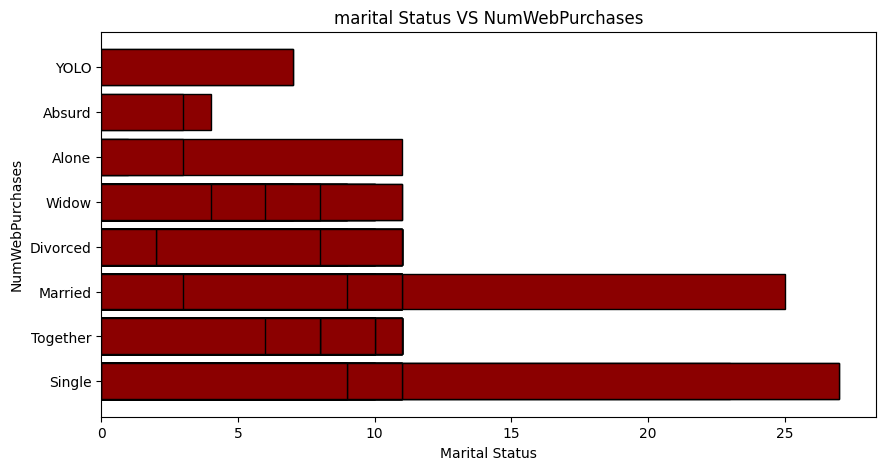

In [42]:
#marital Status VS NumWebPurchases
plt.figure(figsize=(10,5))
plt.barh(df["Marital_Status"],df["NumWebPurchases"],color="darkred",edgecolor="black")
plt.xlabel("Marital Status")
plt.ylabel("NumWebPurchases")
plt.title("marital Status VS NumWebPurchases")
plt.show()

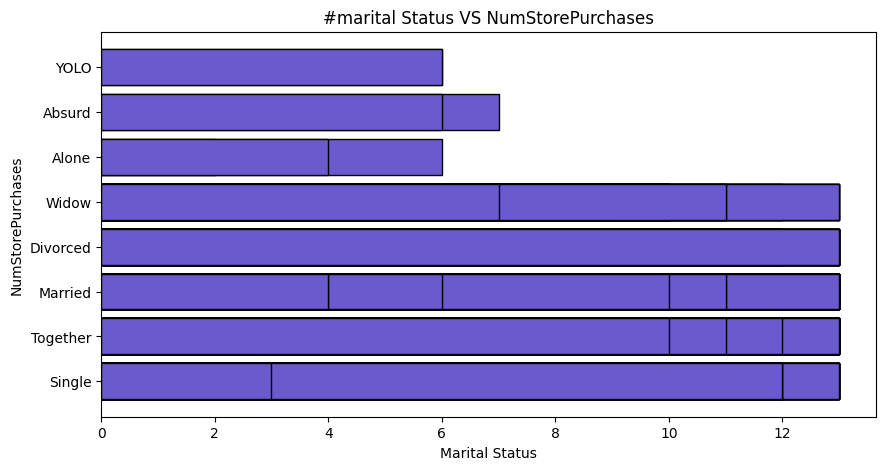

In [43]:
#marital Status VS NumStorePurchases
plt.figure(figsize=(10,5))
plt.barh(df["Marital_Status"],df["NumStorePurchases"],color="slateblue",edgecolor="black")
plt.xlabel("Marital Status")
plt.ylabel("NumStorePurchases")
plt.title("#marital Status VS NumStorePurchases")
plt.show()

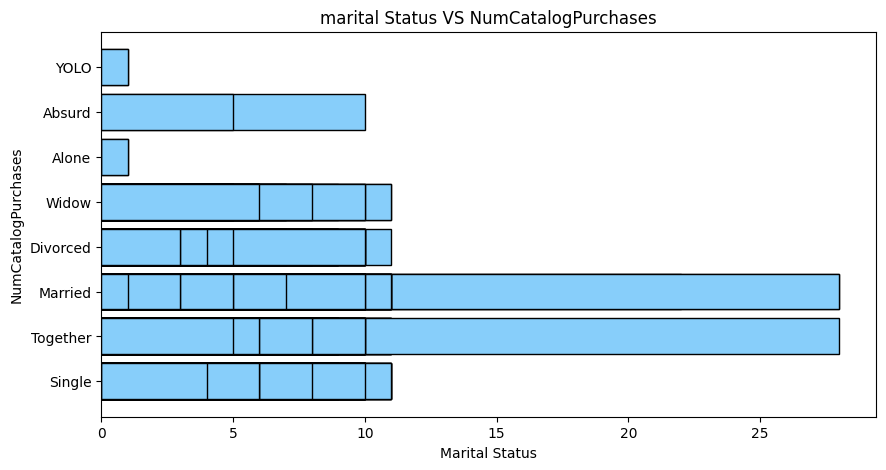

In [44]:
#marital Status VS NumCatalogPurchases
plt.figure(figsize=(10,5))
plt.barh(df["Marital_Status"],df["NumCatalogPurchases"],color="lightskyblue",edgecolor="black")
plt.xlabel("Marital Status")
plt.ylabel("NumCatalogPurchases")
plt.title("marital Status VS NumCatalogPurchases")
plt.show()

1.Web purchases are mostly done in majority by single followed by married persons.

2.Store purchases are done equally by people on marital status those are alone,absurd,YOLO are not in large number anyways.

3.Catalog purchases are done mostly by married & together.

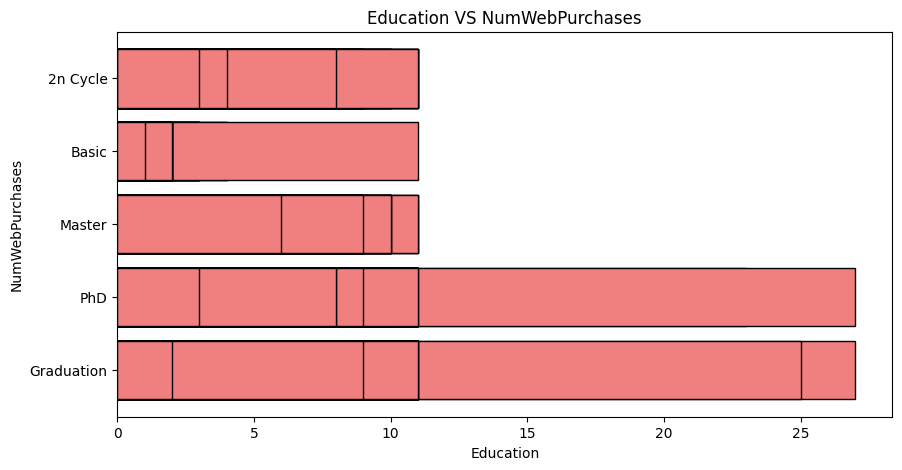

In [45]:
#Education VS NumWebPurchases
plt.figure(figsize=(10,5))
plt.barh(df["Education"],df["NumWebPurchases"],color="lightcoral",edgecolor="black")
plt.xlabel("Education")
plt.ylabel("NumWebPurchases")
plt.title("Education VS NumWebPurchases")
plt.show()

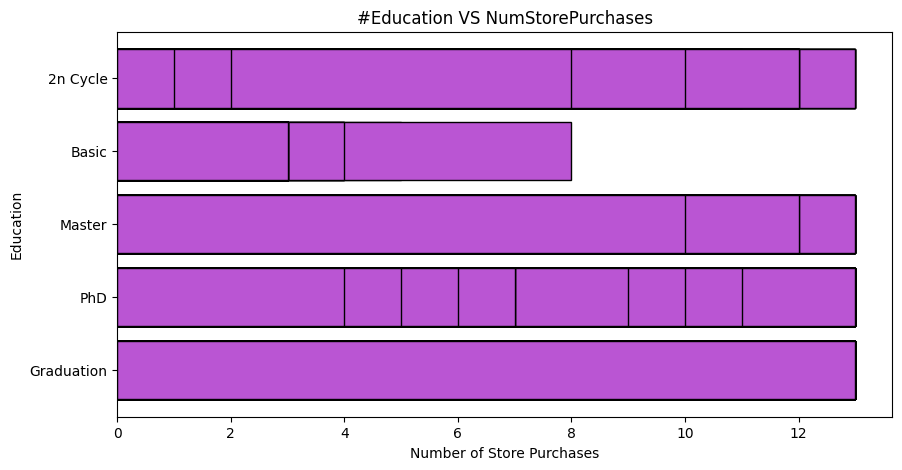

In [46]:
#Education VS NumStorePurchases
plt.figure(figsize=(10,5))
plt.barh(df["Education"],df["NumStorePurchases"],color="mediumorchid",edgecolor="black")
plt.xlabel("Number of Store Purchases")
plt.ylabel("Education")
plt.title("#Education VS NumStorePurchases")
plt.show()

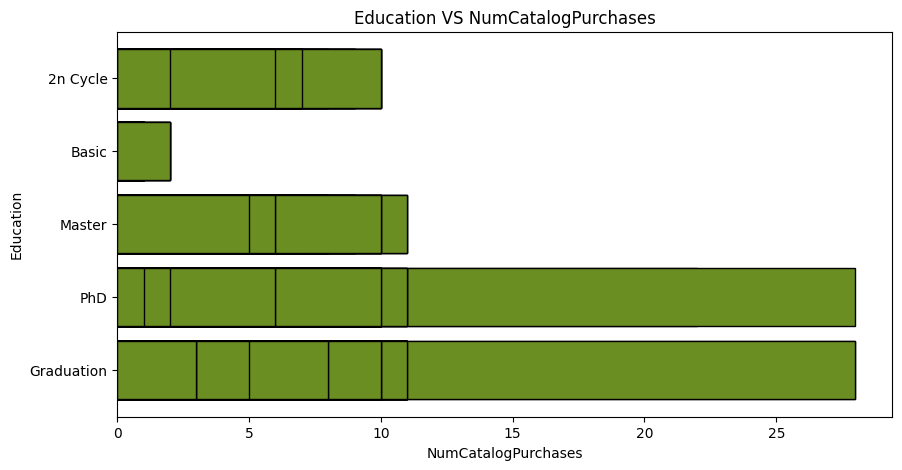

In [47]:
#Education VS NumCatalogPurchases
plt.figure(figsize=(10,5))
plt.barh(df["Education"], df["NumCatalogPurchases"], color="olivedrab",edgecolor="black")
plt.xlabel("NumCatalogPurchases")
plt.ylabel("Education")
plt.title("Education VS NumCatalogPurchases")
plt.show()

1.People with basic education are least in catolog purchase.

2.People with all sort of education visit store but the no.of people with basic are less.

In [48]:
#NumWebVisitsMonth

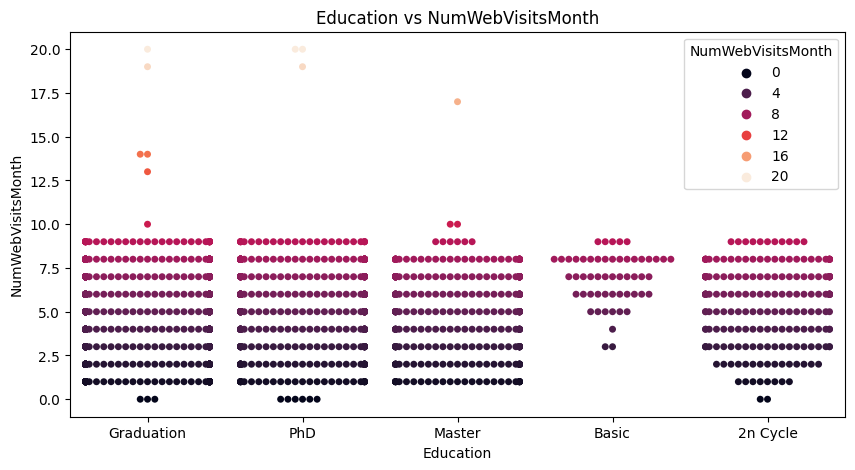

In [49]:
#Education vs NumWebVisitsMonth
plt.figure(figsize=(10,5))
sns.swarmplot(x=df["Education"],y=df["NumWebVisitsMonth"],hue=df["NumWebVisitsMonth"],palette="rocket")
plt.title("Education vs NumWebVisitsMonth")
plt.show()

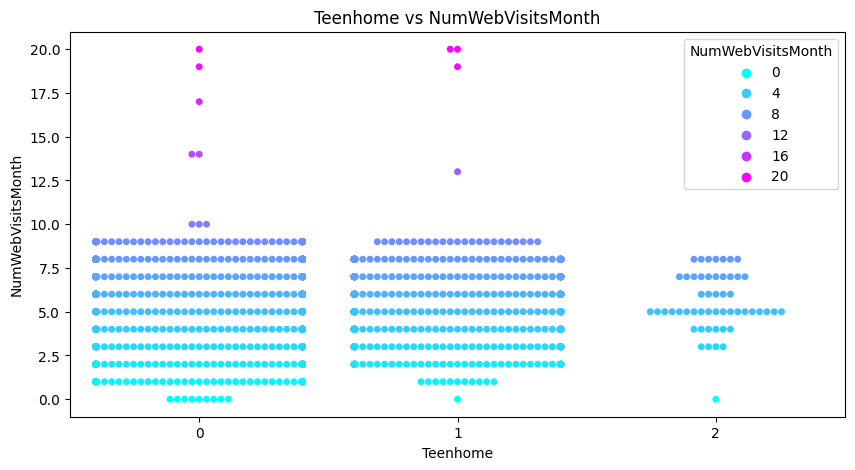

In [50]:
#Teenhome vs NumWebVisitsMonth

plt.figure(figsize=(10,5))
sns.swarmplot(x=df["Teenhome"],y=df["NumWebVisitsMonth"],hue=df["NumWebVisitsMonth"],palette="cool")
plt.title("Teenhome vs NumWebVisitsMonth")
plt.show()

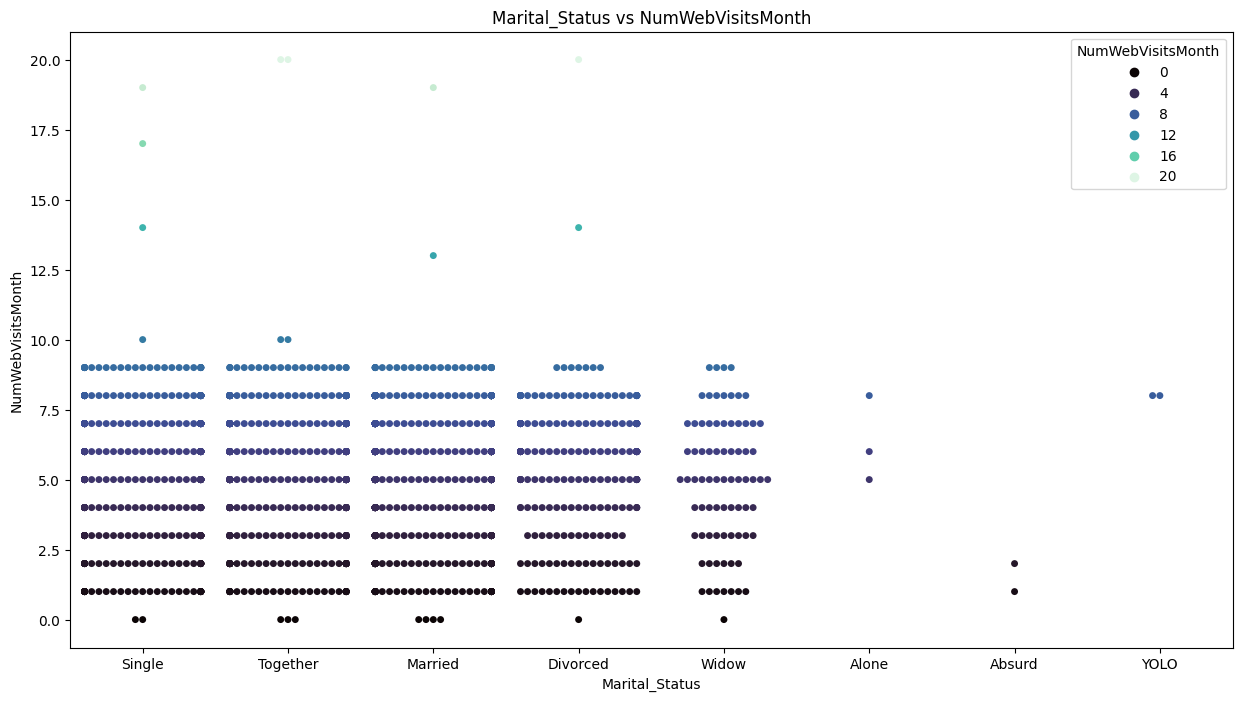

In [51]:
#Marital_Status vs NumWebVisitsMonth
plt.figure(figsize=(15,8))

sns.swarmplot(x=df["Marital_Status"],y=df["NumWebVisitsMonth"],hue=df["NumWebVisitsMonth"],palette="mako")
plt.title("Marital_Status vs NumWebVisitsMonth")
plt.show()

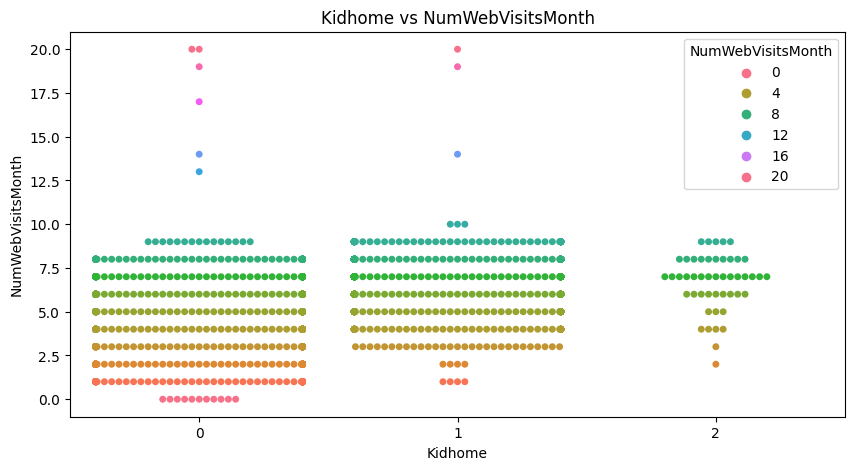

In [52]:
# Kidhome vs NumWebVisitsMonth
plt.figure(figsize=(10,5))

sns.swarmplot(data=df,x="Kidhome",y="NumWebVisitsMonth",hue=df["NumWebVisitsMonth"],palette="husl")
plt.title("Kidhome vs NumWebVisitsMonth")
plt.show()

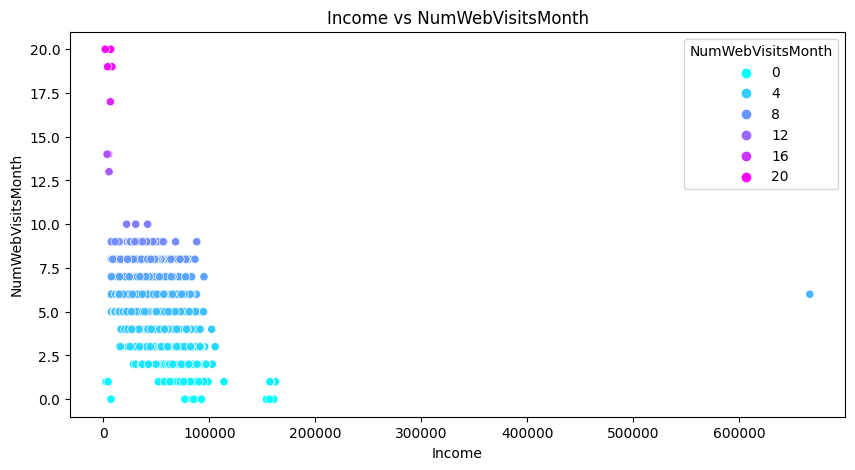

In [53]:
# Income vs NumWebVisitsMonth
plt.figure(figsize=(10,5))

sns.scatterplot(data=df,x="Income",y="NumWebVisitsMonth",palette="cool",hue=df["NumWebVisitsMonth"])
plt.title("Income vs NumWebVisitsMonth")
plt.show()

1.All sort of people visit website but no.of people with basic education are less visting comparitively to others.

2.Was trying to find if no.of visits depends on Teenhome & Kidhome but that was not the case,No sort of relation found 
between them.

3.Marital Status is also a not a consideration for visiting website people with all sort of marital status visit it,count     of widows and others is less because we have very small no.of data regarding to them in the dataset.

4.People with all sort of income are visiting website frequently no pattern identified on one class.


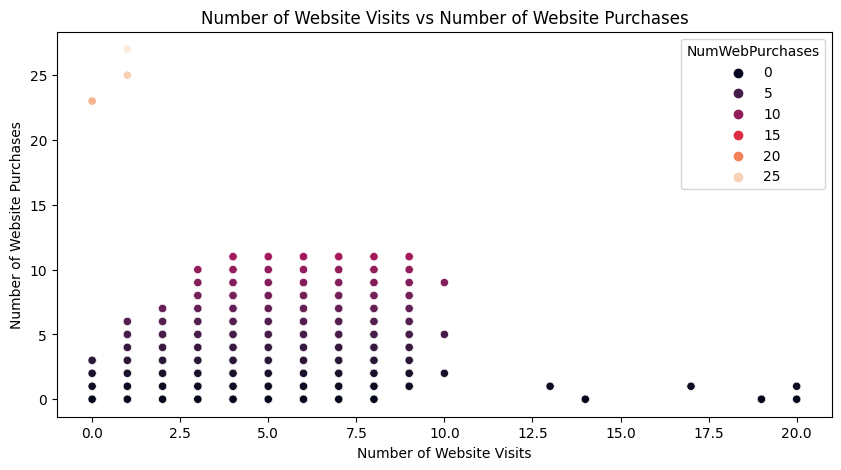

In [54]:
#Number of Website Visits vs Number of Website Purchases
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["NumWebVisitsMonth"], y=df["NumWebPurchases"],hue=df["NumWebPurchases"],palette="rocket")
plt.title("Number of Website Visits vs Number of Website Purchases")
plt.xlabel("Number of Website Visits")
plt.ylabel("Number of Website Purchases")
plt.show()

# Conclusions/Observations:


### Birth Year
1.Dataset is of people born between 1940-2000.

2.2 or 3 variables of data are from year 1900 or earlier it can be result of wrong entry or an outlier.


### Education:
1.Education is divided into 5 types:

    i.Graduation   ---16.5%
    ii.Basic       ---21.7%         
    iii.Master     ---9.1%
    iv.PhD         ---2.4%
    v.2n Cycle     ---50.3%

### Marital Status:

1.Marital Status is divided into 8 types:

    i.Single
    ii.Together
    iii.Married
    iv.Divorced
    v.Widow
    vi.Alone
    vii.Absurd
    viii.YOLO

### Income:
1.Income of Basic education is less comapred to others.

2.Highest Income generated is from Graduation but it is too high,can be wrong entry or outlier as well.
    
3.Birth year wise income is distributed equally but some group of people from birth year 1970-1980 are earning more compared to others.


### Kids & Teens:
1.50.7% of people do not have kids,40.1% people have 1 child whereas 2.1% people have 2childs.

2.51.7% of people do not have teens at their home,46.0% of people have 1 teen wheras 2.3% of people have 2 teens at home.


### Amount Spend:

1.Maximum/Highest amount is spend on wine.

2.People with basic education are not spending any amount on wines.


3.People with basic education are not spending much on fruits & meat as comapared to others

4.All types of people differentiated on basis of martial status are spending nearby same on fruits& meat products.



### Num Deals Purchase (Discount)

1.People Like to purchase when discount is there can be clearly seen that when discount was there many people have brought the items.

### Registrations:
Most of the registrations are from year 2013 in dataset provided of 2 years.


### Complaints:
There are not much complaints of customer only 21 complaints are there


### Amount Spent On Gold:
1.People having 0 teens are spending more on gold followed by 1 and 2.

2.People having 2 kids are spending less on gold comapred with having 1 kid or none.

3..Single & married are spending more on gold than comapred to others.

### Offer Campaigns:
1.It can be clearly seen people doesnt accept the offer in 2nd campaign ,the ratio is almost same in other 3 campaigns.

2.Also majority of people have not accepted offer in last campaign i.e.they are least affected by campaigns.

### Purchases:
1.Web purchases are mostly done in majority by single followed by married persons.

2.Store purchases are done equally by people on marital status those are alone,absurd,YOLO are not in large number anyways.

3.Catalog purchases are done mostly by married & together.

4.People with basic education are least in catolog purchase.

### Store & Website Visit



1.All sort of people visit website but no.of people with basic education are less visting comparitively to others.

2.Was trying to find if no.of visits depends on Teenhome & Kidhome but that was not the case,No sort of relation found between them.

3.Marital Status is also a not a consideration for visiting website people with all sort of marital status visit it,count of widows and others is less because we have very small no.of data regarding to them in the dataset.

4.People with all sort of education visit store but the no.of people with basic are less.

5.People with all sort of income are visiting website frequently no pattern identified on one class.

6.Most of the purchases are done in 1-9 visits.

# DATA PREPROCESSING

In [55]:
#Dropping Date,Month & Year Columns Seperated for EDA purpose
#Dropping ID As well because of high cardinality
#Dropping Dt_Customer as its in str format & even its not of that important

In [56]:
df.drop(["ID","Date_enroll","Month_enroll","Year_enroll","Dt_Customer"],axis=1,inplace=True)

In [57]:
#Checking for duplicates
df.duplicated().sum()

182

In [58]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)

In [59]:
df.duplicated().sum()

0

In [60]:
#All duplicates values have been removed

In [61]:
#Checking For null values
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [62]:
#As Income have 24 null values we are going to drop them
df.dropna(inplace=True)

In [63]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [64]:
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2034.000000    2034.000000  2034.000000  2034.000000  2034.000000   
mean   1968.802852   52357.791544     0.442970     0.508358    48.844641   
std      11.975420   25526.956988     0.535914     0.546130    28.983678   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35528.250000     0.000000     0.000000    24.000000   
50%    1970.000000   51533.000000     0.000000     0.000000    49.000000   
75%    1977.000000   68480.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2034.000000  2034.000000      2034.000000      2034.000000   
mean    305.180924    26.292527       167.763520        37.449361   
std     337.323274    39.772885       226.790697        54.792015   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.000000     2.000000        16.000000         3.000000   
50%     175.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       230.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2034.000000  ...        2034.000000   2034.000000   2034.000000   
mean          27.141101  ...           5.322517      0.074238      0.076205   
std           41.494430  ...           2.438665      0.262222      0.265390   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.750000  ...           7.000000      0.000000      0.000000   
max          262.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2034.000000   2034.000000   2034.000000  2034.000000         2034.0   
mean       0.072271      0.065388      0.012783     0.009833            3.0   
std        0.259000      0.247271      0.112363     0.098696            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2034.0  2034.000000  
mean        11.0     0.153392  
std          0.0     0.360454  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

In [65]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
0       635         88              546  ...                  7             0   
1        11          1                6  ...                  5             0   
2       426         49              127  ...                  4             0   
3        11          4               20  ...                  6             0   
4       173         43              118  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 27 columns]

In [66]:
#Sepearting categorical & numeric Data
df_Numeric=df.select_dtypes(include="int")
df_categoric=df.select_dtypes(include="object")

In [67]:
df_categoric.head()

Education Marital_Status
0  Graduation         Single
1  Graduation         Single
2  Graduation       Together
3  Graduation       Together
4         PhD        Married

In [68]:
#Encoding

In [69]:
enc_categoric=pd.get_dummies(df_categoric)
enc_categoric.head()

Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0                 0              0                      0   
1                 0              0                      0   
2                 0              0                      0   
3                 0              0                      0   
4                 0              1                      0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                     0                        0                       0   
1                     0                        0                       0   
2                     0                        0                       0   
3                     0                        0                       0   
4                     0                        0                       1   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                      1                        0                     0   
1                      1                        0                     0   
2                      0                        1                     0   
3                      0                        1                     0   
4                      0                        0                     0   

   Marital_Status_YOLO  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [70]:
#Concating Numeric & Encoded Categoric Data

In [71]:
final_df=pd.concat([enc_categoric,df_Numeric],axis=1)

In [72]:
final_df.head()

Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0                 0              0                      0   
1                 0              0                      0   
2                 0              0                      0   
3                 0              0                      0   
4                 0              1                      0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                     0                        0                       0   
1                     0                        0                       0   
2                     0                        0                       0   
3                     0                        0                       0   
4                     0                        0                       1   

   Marital_Status_Single  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                      1  ...                  7             0             0   
1                      1  ...                  5             0             0   
2                      0  ...                  4             0             0   
3                      0  ...                  6             0             0   
4                      0  ...                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  
0         11         1  
1         11         0  
2         11         0  
3         11         0  
4         11         0  

[5 rows x 37 columns]

In [73]:
final_df.columns

Index(['Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

# PCA

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(final_df)
df2=pd.DataFrame(scaled_df,columns=final_df.columns)

In [75]:
scaled_df.shape

(2034, 37)

In [76]:
df2.head()

Education_2n Cycle  Education_Basic  Education_Graduation  \
0           -0.316313        -0.157115              0.998035   
1           -0.316313        -0.157115              0.998035   
2           -0.316313        -0.157115              0.998035   
3           -0.316313        -0.157115              0.998035   
4           -0.316313        -0.157115             -1.001969   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0         -0.444837      -0.529198              -0.031373   
1         -0.444837      -0.529198              -0.031373   
2         -0.444837      -0.529198              -0.031373   
3         -0.444837      -0.529198              -0.031373   
4         -0.444837       1.889652              -0.031373   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0             -0.038433                -0.344691               -0.795251   
1             -0.038433                -0.344691               -0.795251   
2             -0.038433                -0.344691               -0.795251   
3             -0.038433                -0.344691               -0.795251   
4             -0.038433                -0.344691                1.257465   

   Marital_Status_Single  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0               1.906111  ...           0.688038      -0.28318     -0.287212   
1               1.906111  ...          -0.132284      -0.28318     -0.287212   
2              -0.524629  ...          -0.542445      -0.28318     -0.287212   
3              -0.524629  ...           0.277877      -0.28318     -0.287212   
4              -0.524629  ...          -0.132284      -0.28318     -0.287212   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0     -0.279108     -0.264506      -0.11379 -0.099652            0.0   
1     -0.279108     -0.264506      -0.11379 -0.099652            0.0   
2     -0.279108     -0.264506      -0.11379 -0.099652            0.0   
3     -0.279108     -0.264506      -0.11379 -0.099652            0.0   
4     -0.279108     -0.264506      -0.11379 -0.099652            0.0   

   Z_Revenue  Response  
0        0.0  2.349304  
1        0.0 -0.425658  
2        0.0 -0.425658  
3        0.0 -0.425658  
4        0.0 -0.425658  

[5 rows x 37 columns]

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca=PCA(n_components=37)
pca.fit_transform(df2)

array([[ 3.92126114e+00, -9.61448340e-01, -4.18362311e-01, ...,
         6.81726420e-15,  4.70969941e-16,  1.84690340e-17],
       [-2.36140150e+00, -5.12049484e-01, -3.04982935e-01, ...,
         3.94533695e-15,  1.38987152e-17, -3.82208087e-17],
       [ 1.50092229e+00, -4.27692395e-01, -1.38093928e+00, ...,
        -1.53724166e-14,  7.59451335e-17,  3.11820417e-17],
       ...,
       [ 1.50103128e+00,  2.68854853e-01,  4.08566507e-01, ...,
        -3.13574979e-16,  1.56782122e-17, -9.09263745e-18],
       [ 1.56188422e+00,  1.38250713e+00, -1.05948585e+00, ...,
         7.86248061e-16,  1.99674898e-17, -6.51998320e-18],
       [-1.78295060e+00,  1.65644879e+00,  1.32880184e+00, ...,
         1.41045263e-15, -4.02049749e-18, -8.11276839e-18]])

In [79]:
#expalined variance ratio
pca.explained_variance_ratio_

array([1.72192328e-01, 6.28764599e-02, 5.61055137e-02, 4.64831620e-02,
       4.32938627e-02, 4.07701572e-02, 3.76059249e-02, 3.50710137e-02,
       3.40452270e-02, 3.32582107e-02, 3.07888139e-02, 2.99418829e-02,
       2.98386064e-02, 2.90265643e-02, 2.84050295e-02, 2.75235307e-02,
       2.67648958e-02, 2.64538757e-02, 2.27422479e-02, 2.09773868e-02,
       1.90604822e-02, 1.77636535e-02, 1.69051260e-02, 1.62791683e-02,
       1.52097793e-02, 1.44799030e-02, 1.22756402e-02, 1.18222605e-02,
       1.06760730e-02, 1.00919538e-02, 8.94729489e-03, 6.60407766e-03,
       5.71989396e-03, 8.92816949e-30, 2.40570590e-30, 7.05358138e-34,
       7.05358138e-34])

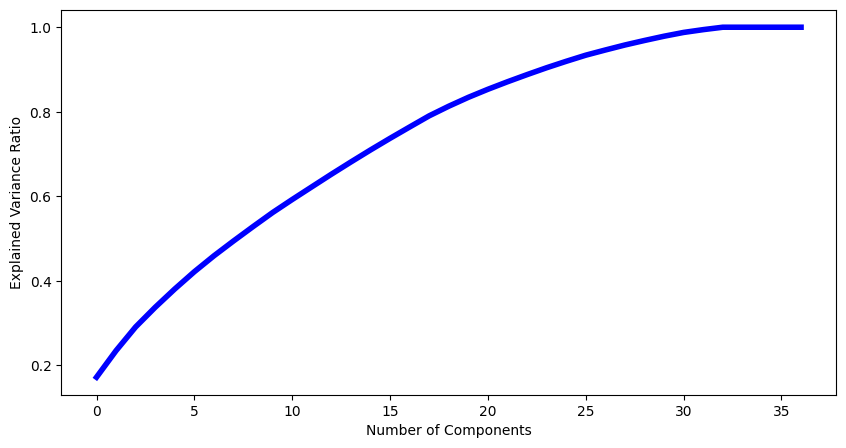

In [80]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=4,markersize=10,color="blue")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

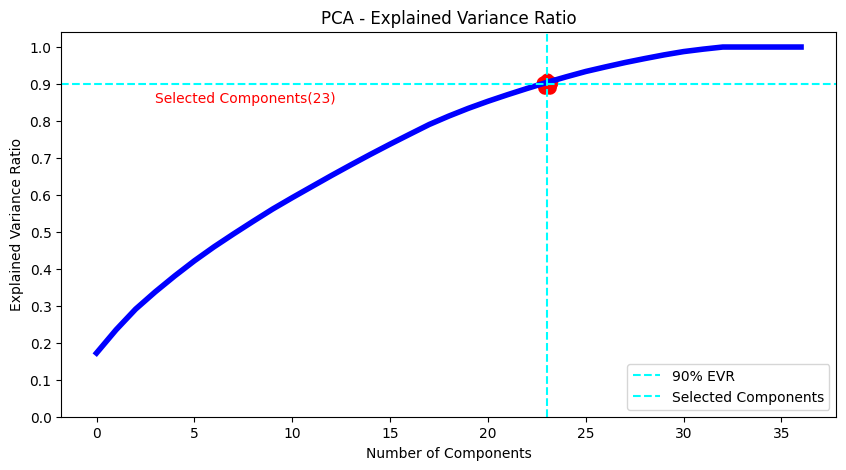

In [81]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='blue', linewidth=4,)
plt.axhline(y=0.9, color='cyan', linestyle='--', label='90% EVR')
plt.axvline(x=23, color='cyan', linestyle='--', label='Selected Components')
plt.scatter(23,0.9,marker="*",linewidths=10,color="red")
plt.title('PCA - Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.text(3, 0.85, 'Selected Components(23)', color='r')
plt.legend(loc="lower right")
plt.show()

In [82]:
#23 components are showing 90% of the variance in our data,so we'll build our PCA again with 23 components

In [83]:
pca=PCA(n_components=23)

In [84]:
df3=pd.DataFrame(pca.fit_transform(df2))

In [85]:
df3.head()

0         1         2         3         4         5         6   \
0  3.921261 -0.961448 -0.418362  1.552713 -0.998744  2.012662 -1.186018   
1 -2.361402 -0.512049 -0.304983  0.592715 -1.036934 -0.347183 -1.857775   
2  1.500922 -0.427692 -1.380939  0.160132 -1.317587 -0.722257  0.748517   
3 -2.259714 -1.557122 -0.086753  0.581038 -1.127287 -0.954844  1.062398   
4 -0.590543  0.331769 -0.096791 -0.775769  1.749521  0.541293 -0.048923   

         7         8         9   ...        13        14        15        16  \
0  0.352056 -0.528134  0.317916  ... -0.009925 -0.100932 -0.433842  0.313728   
1  0.830816 -0.269280  0.177453  ...  0.313937  0.147004 -0.495361 -0.702992   
2 -0.629505 -0.117337  0.830903  ... -0.314212 -0.080473  0.119248 -0.834847   
3 -0.710251 -0.124947  0.896237  ... -0.047128  0.194826 -0.420998 -0.098859   
4 -1.439071 -1.174442 -0.200268  ...  0.378796  0.457970 -0.278698  1.372300   

         17        18        19        20        21        22  
0 -0.591833 -0.388574  1.021517 -1.025045  2.391427 -0.585091  
1  0.651955 -0.953669  0.966946  0.072784  0.070859  0.146512  
2 -0.193998  0.511665 -1.223637 -0.635158 -0.113368 -0.225591  
3 -0.688736  0.495678 -0.408898  0.273013 -0.461451 -0.008903  
4 -1.046006  0.756513  0.588279 -0.326767 -0.036088 -0.290799  

[5 rows x 23 columns]

# Clustering

## 1.Kmeans Clustering

In [86]:
from sklearn.cluster import KMeans

In [87]:
wcss=[]

In [88]:
for i in range(1,5):
    kmean=KMeans(n_clusters=i,init="random",random_state=42)
    kmean.fit(df3)
    wcss.append(kmean.inertia_)

In [89]:
print(wcss)

[63209.17068842067, 53715.05325913172, 50513.2058863454, 48277.99630918749]


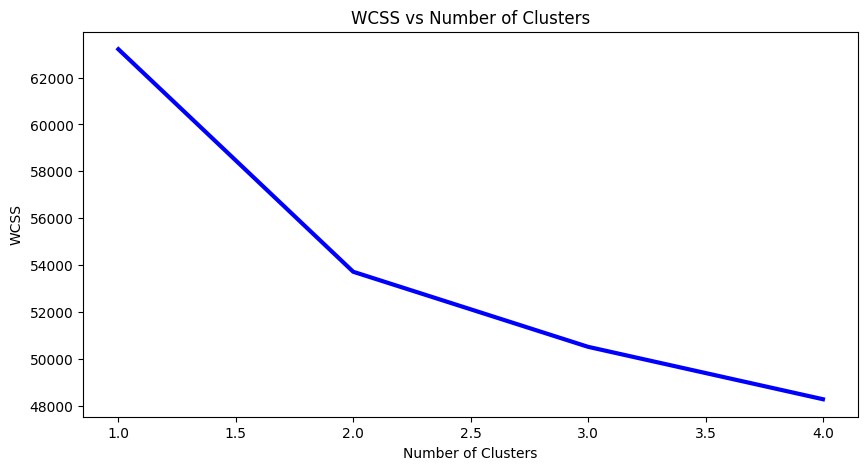

In [90]:
plt.figure(figsize=(10,5))
plt.plot(range(1,5),wcss,color="blue",linewidth=3)
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

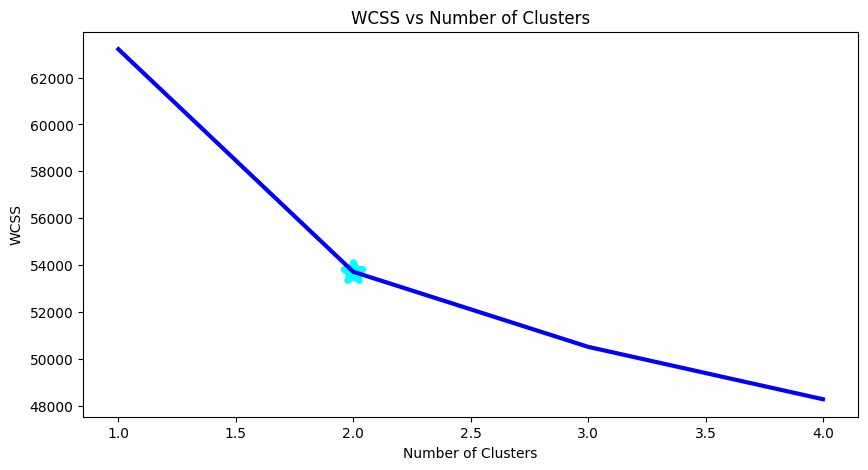

In [91]:
plt.figure(figsize=(10,5))
plt.plot(range(1,5),wcss,color="blue",linewidth=3)
plt.title('WCSS vs Number of Clusters')
plt.scatter(2,wcss[1],s=200,c="cyan",marker="*",linewidth=5)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
from sklearn.metrics import silhouette_score

In [93]:
silhouette_score_lst=[]

for i in range(2,6):
    silhouette_score_lst.append(silhouette_score(df3,(KMeans(n_clusters=i).fit_predict(df3))))

In [94]:
silhouette_score_lst

[0.18256678718476038,
 0.12700562566607432,
 0.1277324002054649,
 0.1374240774785371]

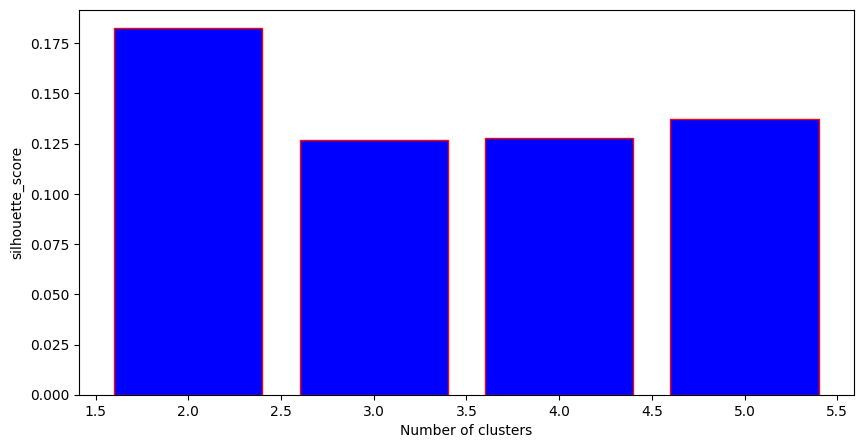

In [95]:
#plotting
plt.figure(figsize=(10,5))

k=[2,3,4,5]
plt.bar(k,silhouette_score_lst,color="blue",edgecolor="red")

plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()

##### Elbow Graph shows that we should select 2 clusters and also silhouette scores is maximum when clusters are 2

In [96]:
#Making model again with 2 clusters

In [97]:
kmeans=KMeans(n_clusters=2,random_state=42)

In [98]:
kmeans.fit(df3)

KMeans(n_clusters=2, random_state=42)

In [99]:
pred=kmeans.predict(df3)
pred

array([1, 0, 1, ..., 1, 1, 0])

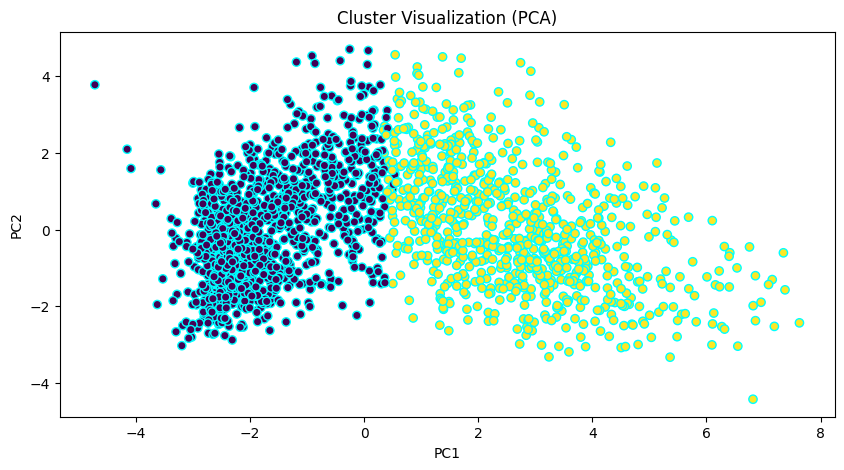

In [100]:
x = df3.iloc[:, 0]
y = df3.iloc[:, 1]
plt.figure(figsize=(10,5))
plt.scatter(x, y, c=pred,edgecolors="cyan")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization (PCA)')
plt.show()

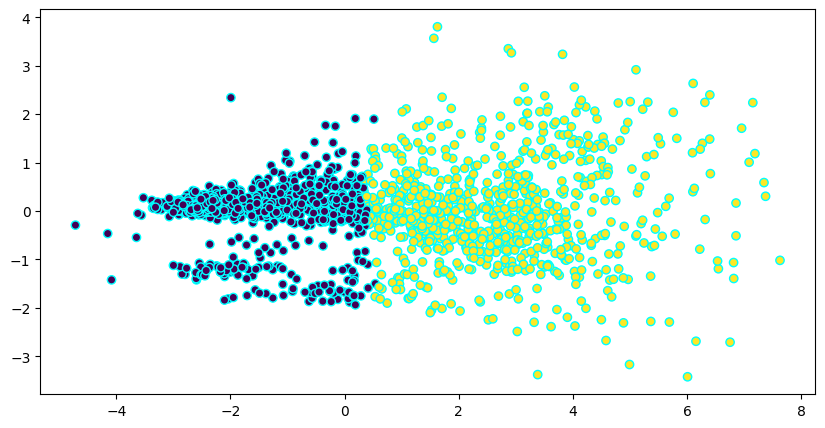

In [101]:
x = df3.iloc[:, 0]
y = df3.iloc[:, 22]
plt.figure(figsize=(10,5))
plt.scatter(x, y, c=pred,edgecolors="cyan")
plt.show()

<Figure size 1000x500 with 0 Axes>

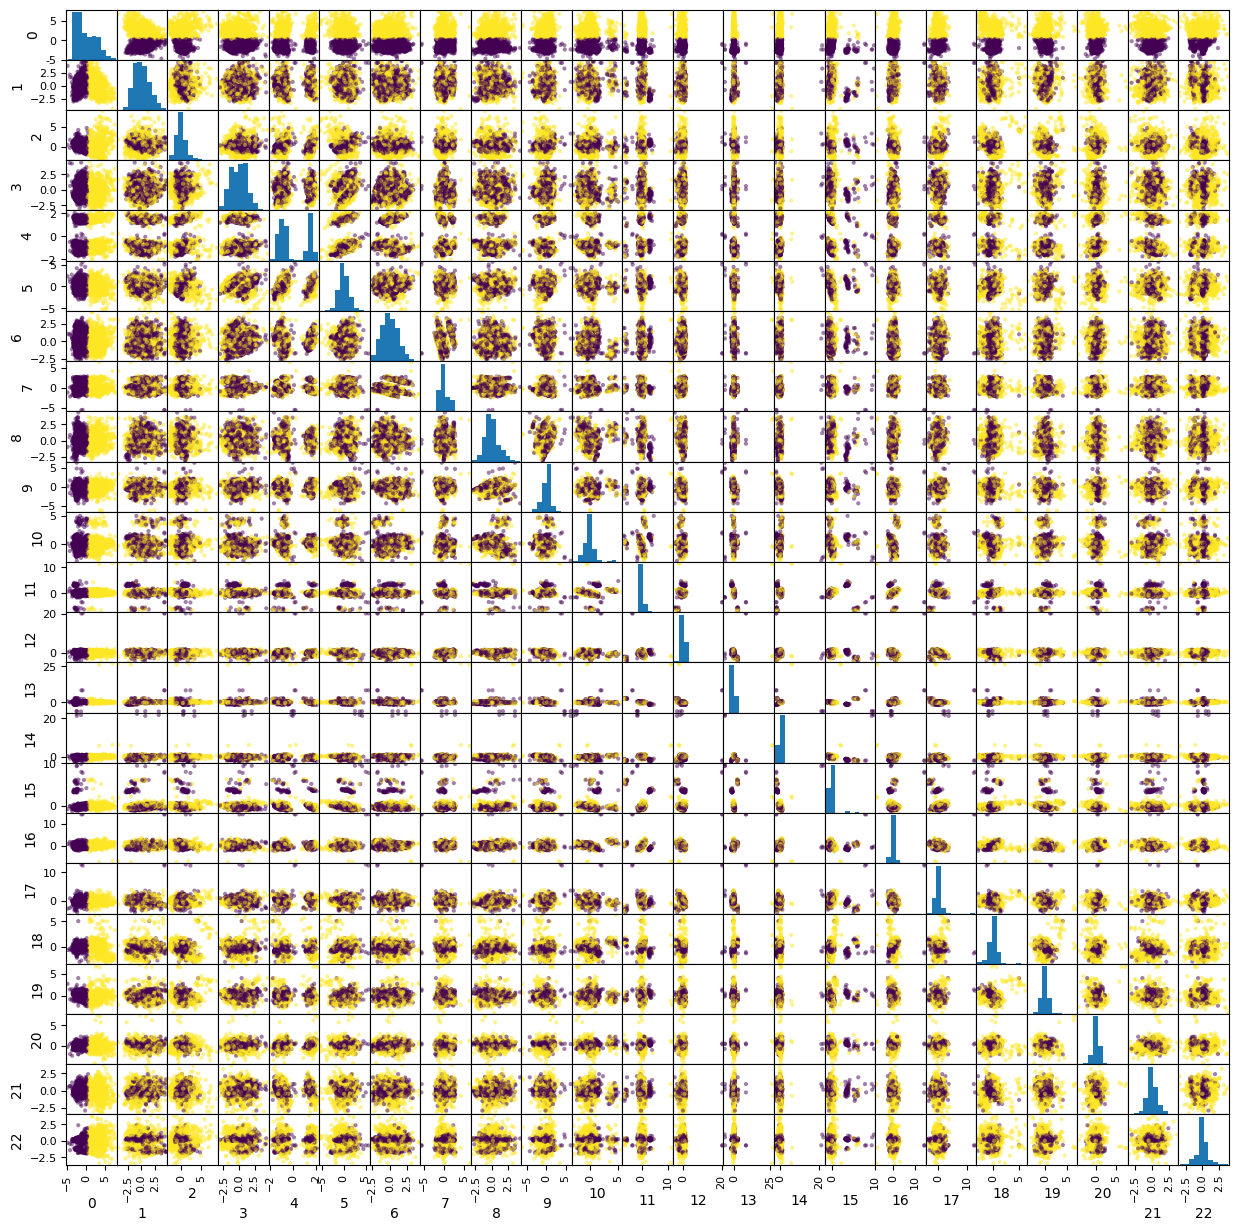

In [102]:
# visualzing all
plt.figure(figsize=(10,5))

pd.plotting.scatter_matrix(pd.DataFrame(df3), c=pred, figsize=(15,15), diagonal='hist')
plt.show()

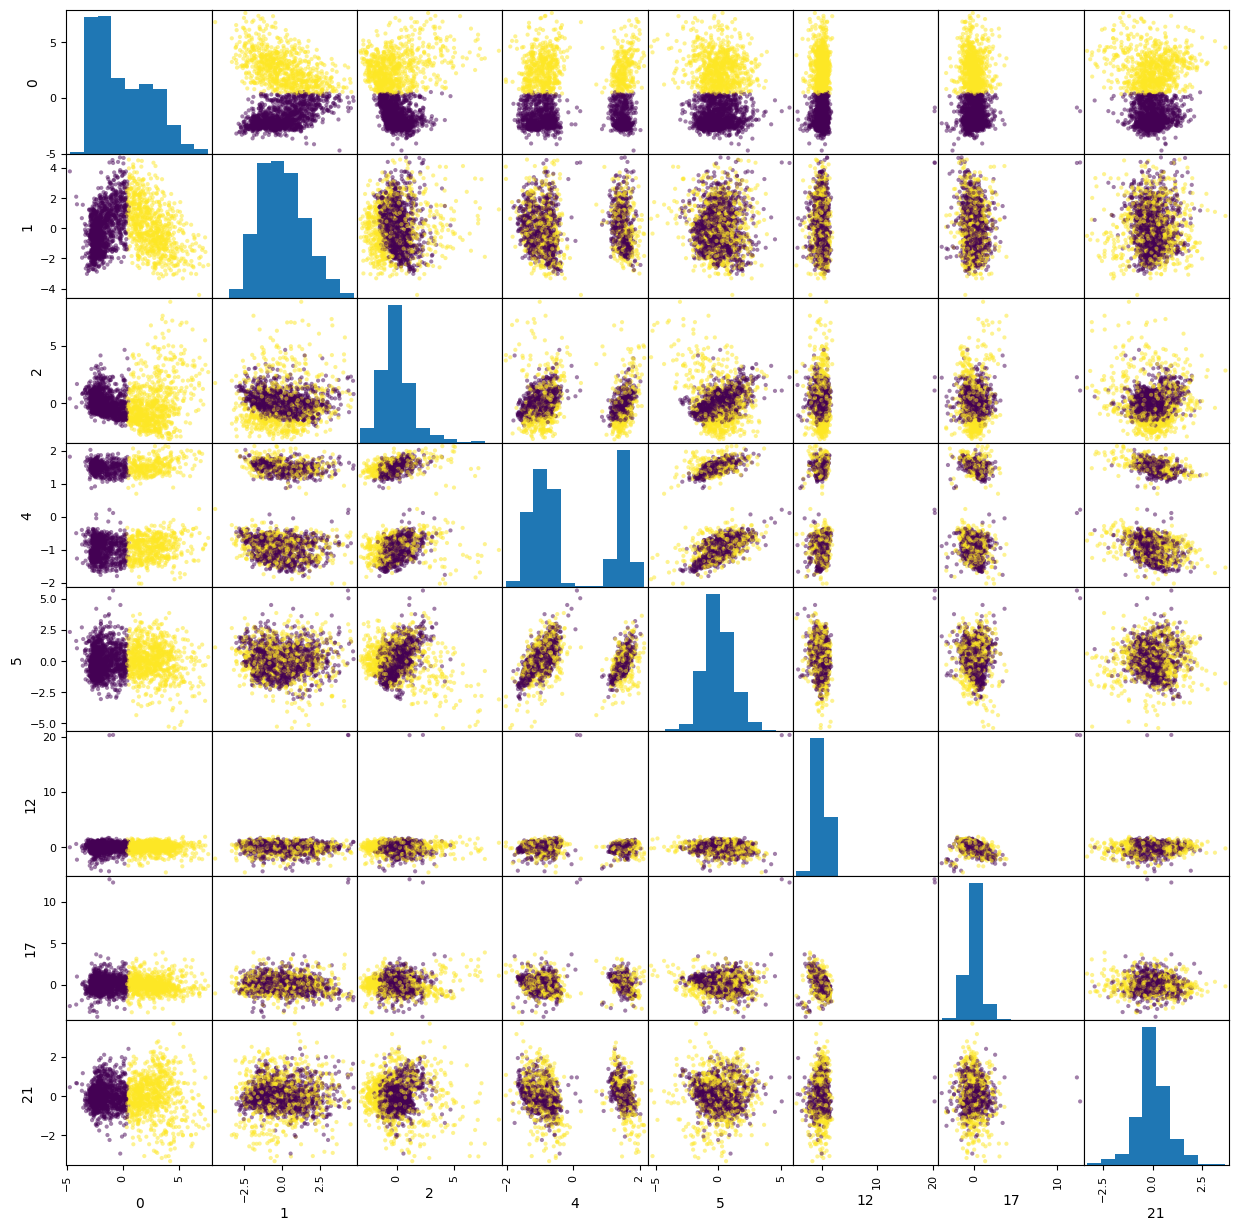

In [103]:
#Viewing subset of it
dim_subset = [0, 1, 2, 4, 5,12,17,21]
pd.plotting.scatter_matrix(pd.DataFrame(df3.iloc[:, dim_subset]), c=pred, figsize=(15,15), diagonal='hist')
plt.show()

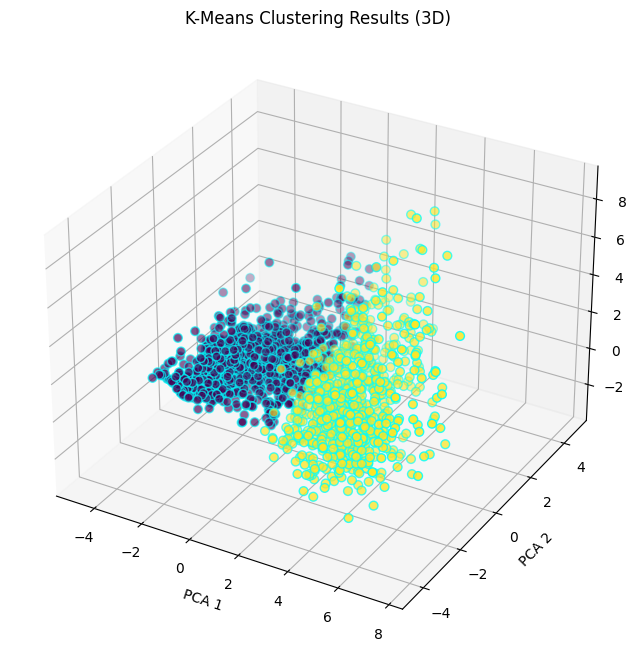

In [104]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot with different colors for each cluster
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], c=pred, s=40,edgecolor="cyan")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('K-Means Clustering Results (3D)')
plt.show()

# 2.Hierachial Clustering

In [105]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

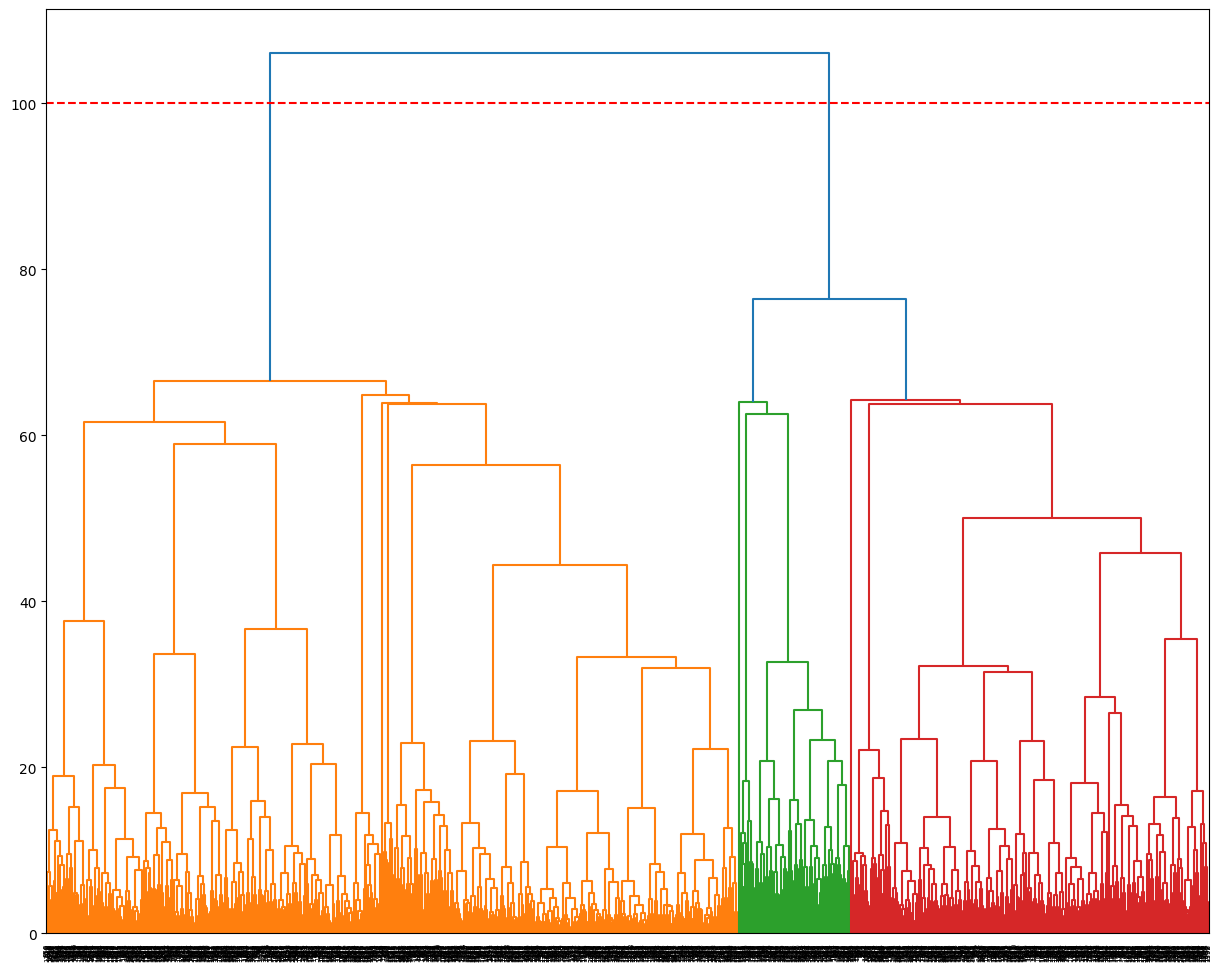

In [106]:
plt.figure(figsize=(15,12))
den=shc.dendrogram(shc.linkage(df3,method="ward"))
plt.axhline(y=100,color="r",linestyle="--")
plt.show()

#### Hierachial is showing with 100 clusters so its definately not a good approach.

# 3.DBSCAN

In [107]:
from sklearn.cluster import DBSCAN

In [108]:
dbscan=DBSCAN(eps=27,min_samples=70)
dbscan.fit(df3)

DBSCAN(eps=27, min_samples=70)

In [109]:
#Checking labels
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
#Total no of clusters
len(set(dbscan.labels_))

2

In [111]:
from sklearn.metrics import silhouette_score
silhouette_score(df3,dbscan.labels_)

0.7784382051017666

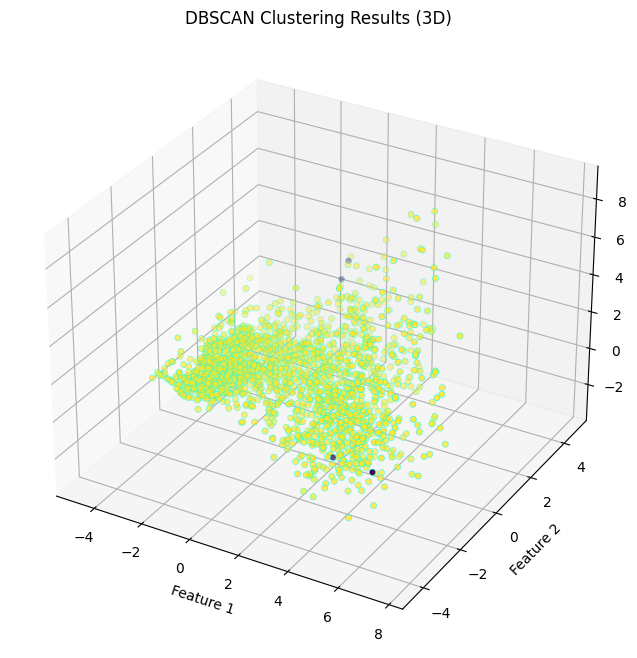

In [112]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3.iloc[:, 0], df3.iloc[:, 1],df3.iloc[:, 2], c=dbscan.labels_,edgecolor="cyan",linewidth=0.4)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering Results (3D)')
plt.show()

### Conclusions:

 1.Both KMeans and DBSCAN were able to efficiently separate out the clusters in the dataset.

 2.However, when comparing the two algorithms using the silhouette score, DBSCAN outperformed KMeans with a score of 0.7784, while KMeans had a score of 0.182. This suggests that, despite the fact that KMeans appeared to perform better visually, the clusters produced by DBSCAN were more distinct and better separated.

 3.Therefore, based on the silhouette score, DBSCAN is a better clustering algorithm for this dataset.

# 

# 

## Project By:

 ### **Rohit Vyavahare**


###  Linkedin https://www.linkedin.com/in/rohitvyavahare2001/

### Github : https://github.com/RohitVyavahare2001